<img src="https://goodwillcars.com/wp-content/uploads/2019/08/Goodwill-Auto-Auction-T1-Header-Auction-08_2019-UPDATE.jpg" alt="drawing" height="400"/>

[Image credit >>](https://goodwillcars.com/wp-content/uploads/2019/08/Goodwill-Auto-Auction-T1-Header-Auction-08_2019-UPDATE.jpg)

## Used-cars auction prices: what matters most?
---

<a id="toc"></a>

<font color="lightseagreen" size=+2.5><b>Table of Contents</b></font>

* [1. Introduction](#1)
* [2. Load, Skim and Pre-process Data](#2)
* [3. EDA and Data Visualizations](#3)
* [4. Concluding Remark](#4)
* [5. Reference](#5)

---


<a id="1"></a>

<font color="lightseagreen" size=+2.5><b>1. | Introduction </b></font>

According to ***McKinsey & Company*** report, the digital revolution is disrupting **used-car retailing**—for the better. Because it focuses a spotlight on the importance of the customer experience in the used-car-buying process, this new wave of digital retailing represents more than technology alone. McKinsey & Company's proprietary customer research revealed that online providers are beginning to dilute traditional used-car dealers’ positions and drive growth by empowering digitally savvy customers via ***three*** major capabilities:
- complete end-to-end purchasing capabilities (desired by 59 percent of buyers)
- **extensive vehicle data** and photos, along with effective search tools (desired by 64 percent of buyers)
- unique delivery options (desired by 28 percent of online buyers)

"The US used-car market is more than twice the size of the new-car segment and is outpacing it in growth. McKinsey’s auto retail micro-market model (ARM3) for used-car demand in the United States estimates that Americans buy 39.4 million used cars each year, versus 17.3 million new ones (2018), and that used-vehicle sales will increase faster than new-vehicle sales over the next five years. Used cars offer a relatively countercyclical safe harbor from the dramatic sales highs and lows seen among new vehicles, with peak-to-trough declines averaging about 11 percent over the past two decades, compared with 23 percent for new ones. Historically, used-car sales have had less volatile reactions to market shocks, such as the 2009 recession" [McKinsey & Company.](https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/used-cars-new-platforms-accelerating-sales-in-a-digitally-disrupted-market)

From the McKinsey & Company report it is clear that the used-car market is booming. But what are the features & info used-car buyers want most? According to CarStory’s January survey of online used-car shoppers, **Vehicle condition**, which got a score of 81 out of 100. Next up was accident history (77), followed by service history (75), listing **price** (74), value of the vehicle (73), **make** (72) and **mileage** (71). For the complete list of most important details see the [reference.](https://www.autoremarketing.com/trends/features-info-used-car-buyers-want-most)

So using [used-cars auction prices](https://www.kaggle.com/tunguz/used-car-auction-prices) dataset, I will try to answer the question "what features matter most when people are buying used-cars at auctions?".



### Objectives: 
- Practicing EDA and data visualizations using R.
- To explore the dataset and see which features of a car make a used car desirable at auctions.

### About the dataset
- "The dataset contains historical car auction sales prices, scraped from the outside internet sources. The dataset has been collected in 2015, and will not be updated." [Bojan Tunguz (@tunguz)](https://www.kaggle.com/tunguz)

<a href="#toc">Back to top</a>


<a id="2"></a>

<font color="lightseagreen" size=+2.5><b>2. | Load, Skim and Pre-process Data </b></font>

### Set-up

In [1]:
library(tidyverse)
library(skimr)
library(DataExplorer)
library(stringr)
library(patchwork)
library(ggrepel)
list.files(path = "../input")

theme <- theme(plot.margin = margin(10, 10, 10, 5, "mm"),              
              plot.background = element_rect(fill = "#f6f5f4"), 
              plot.title = element_text(size = 24),                   
              plot.subtitle = element_text(size = 16),                
              axis.text = element_text(size = 16),
              axis.title = element_text(size = 16),              
              legend.title = element_text(size = 16),                 
              legend.text = element_text(size = 14)) 

options(warn = -1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "used-car-auction-prices"

### Load data and investigate

In [2]:
cars <- read_csv(file = '../input/used-car-auction-prices/car_prices.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  year = col_double(),
  make = col_character(),
  model = col_character(),
  trim = col_character(),
  body = col_character(),
  transmission = col_character(),
  vin = col_character(),
  state = col_character(),
  condition = col_double(),
  odometer = col_double(),
  color = col_character(),
  interior = col_character(),
  seller = col_character(),
  mmr = col_double(),
  sellingprice = col_double(),
  saledate = col_character()
)




### Head of the dataFrame
* The dataset has 558832 rows and 16 columns.

In [3]:
nrow(cars)
head(cars, 3)

[1] 558832

year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


### Data Dictionary
- Date : The year of production of the cars.
- Make : The brand of the car.
- Model : The edition of the car of a specific brand.
- Trim : The trim levels for a car are just different versions of the model.
- Body : The body style of a vehicle refers to the shape and model of a particular car make.
- Transmission : The mechanism that moves the power from the engine to the wheels.
- VIN : Vehichel identification number.
- State : The state in which the car is auctioned.
- Condition : The condition of the cars being at the time of auction. 
- Odometer : The distance the car has travelled since manufactured.
- Color : Exterior color of the car.
- Interior : Interior color of the car.
- Seller : The seller of the car, car dealers.
- mmr : Manhiem market record, the market estimated price of the cars.
- sellingprice : The price a car was sold at auctions.
- saledate : The date on which the car has been sold.


### Let's skim over the data summary
- Using the skimr library we can have an overview of the dataframe.

In [4]:
skim(cars)

── Data Summary ────────────────────────
                           Values
Name                       cars  
Number of rows             558832
Number of columns          16    
_______________________          
Column type frequency:           
  character                11    
  numeric                  5     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
   skim_variable n_missing complete_rate   min   max empty n_unique whitespace
 1 make              10300         0.982     2    13     0       96          0
 2 model             10398         0.981     1    29     0      973          0
 3 trim              10650         0.981     1    46     0     1966          0
 4 body              13194         0.976     3    23     0       87          0
 5 transmission      65351         0.883     5     9     0        4          0
 6 vin                   4         1.00      9    17     0   55

### Visualize the missing values
* Transmission has the larger NA's with 11.7%. Not a massiviely huge NA's.

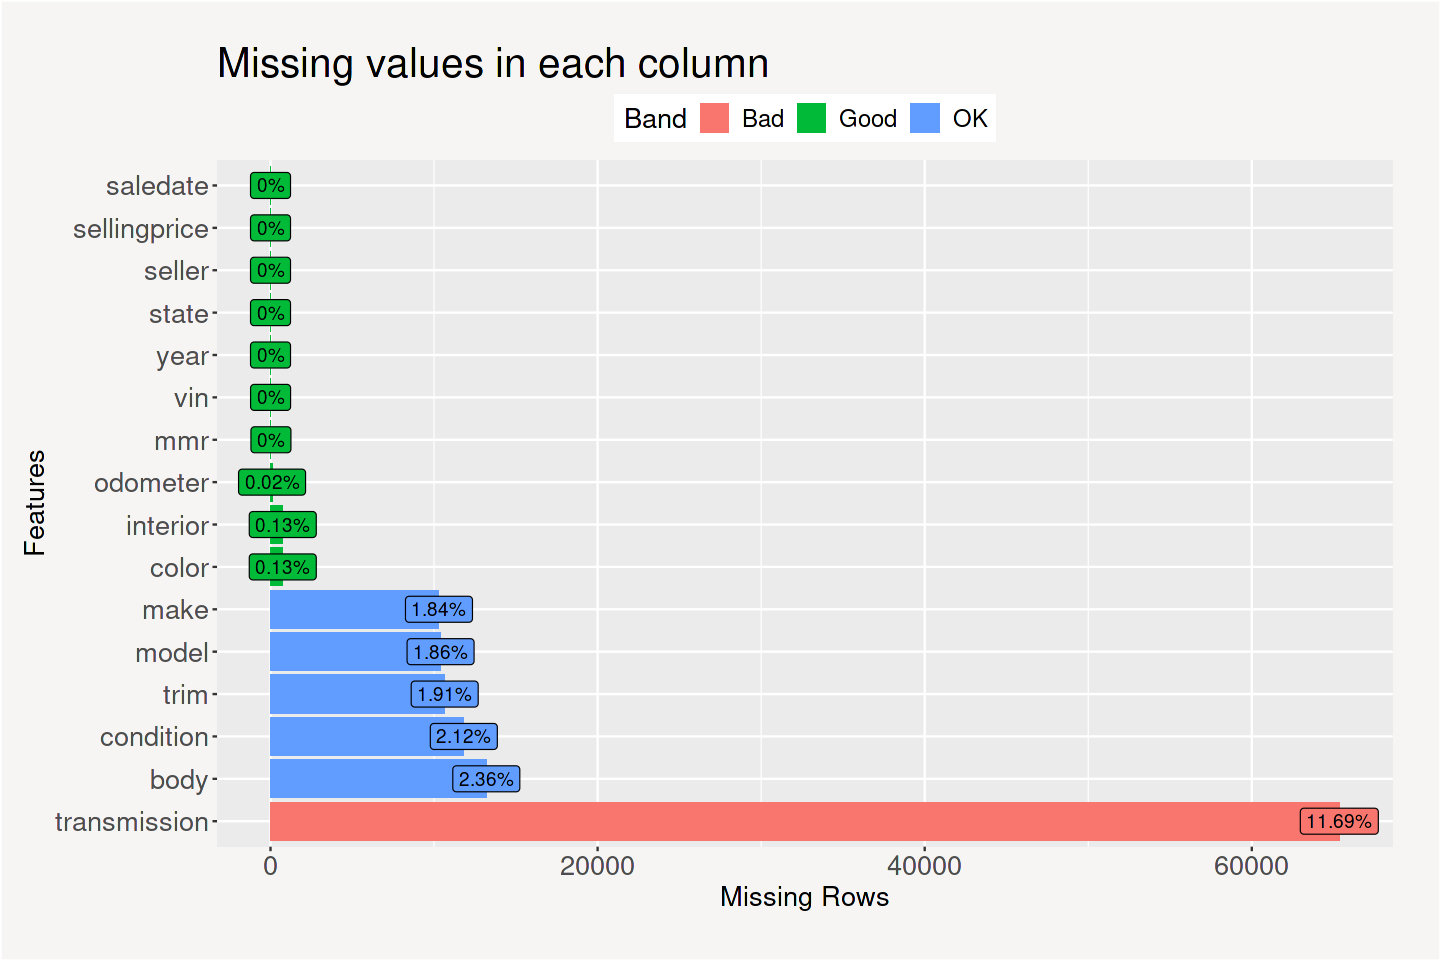

In [5]:
options(repr.plot.width = 12, repr.plot.height = 8)
plot_missing(
  cars,
  group = list(Good = 0.002, OK = 0.05, Bad = 0.8, Remove = 1),
  missing_only = FALSE, # true if you want to show only the columns with missing valuse (important if you have high number of features with no missing values)
  geom_label_args = list(),
  title = 'Missing values in each column',
  ggtheme = theme,
  theme_config = list(legend.position = c("top"))
)

### Checking unique values in each column

In [6]:
unique_values <- rapply(cars,function(x) length(unique(x)))
unique_values

year         make        model         trim         body transmission 
          34           97          974         1967           88            5 
         vin        state    condition     odometer        color     interior 
      550293           64           42       172287           47           18 
      seller          mmr sellingprice     saledate 
       14270         1102         1887         3766

### Observations: 

> #### 1 VIN: 
> VIN should be a unique number, atleast a legally registred one. But from the about skim we see that it is not case. There are 550292 unique vin vs 558832 total cars, ie 8540 (~1.53% of total data) duplicate vin's. 

In [7]:
cars$vin[duplicated(cars$vin)]

[1] "2cndl13f056137366" "wbagn63403ds43612" "1gket63m672242776"
   [4] "5n1ar18w77c615027" "2hnyd182x4h516719" "2g4ws52j141171868"
   [7] "5n1aa08bx4n743504" "1g8js54f42y588994" "1fmru17lxxlb48758"
  [10] "jnrar05y4xw049475" "1g1jc1248v7150365" "5npec4ab7dh504364"
  [13] "5fnyf4h55cb009470" "4jgda7eb0ca049551" "1gb6g3bg6a1146243"
  [16] "3c4fy58834t214497" "1n4bl11d44c166703" "1gncs13wxw2254123"
  [19] "5fnrl5h60cb007623" "2g1wd5em7a1256996" "1ftex1cw2ake55543"
  [22] "2hgfg1b87ah524355" "wbawb73589p046939" "1ftpw14v89ka34567"
  [25] "3fahp08z09r134348" "2hgfa16529h369937" "1gkfk03269r295118"
  [28] "jtdkb20u993486675" "3gcec13c98g244598" "1g1yy36w685115301"
  [31] "3gnfk12y98g108547" "1b3lc76m68n588185" "salfp24nx8h044925"
  [34] "5tfrv54137x011794" "1gyee637560126358" "1gcgg25v561109079"
  [37] "1fmfu18576la00164" "wdbrf52hx6f751049" "1gyee637750103999"
  [40] "1mefm40195g624858" "2hnyd18824h508134" "1fmju1h55eef43140"
  [43] "jnkcv51e84m102083" "5tdza22c04s132556" "jthbf30g430129416"
  [46] "wmwrc33402tc38348" "1fbne3bl6eda32312" "wdblk65g8xt024179"
  [49] "1c4sdhctxdc691799" "1zvbp8cf0d5248662" "kmhec4a4xda075760"
  [52] "kmhtc6ad4du092720" "jthbe1bl6d5007002" "jf1gpau61d2835586"
  [55] "5yfbu4ee2dp206358" "5tdbk3eh6ds203254" "5tfuu4en5dx072813"
  [58] "wauggafc3cn068721" "5uxzv4c50cl988423" "3gcpkse7xcg265437"
  [61] "2g1wg5e31c1328471" "1ftns2el5cdb25264" "1gkkrted9cj248360"
  [64] "1n6ad0ev6cc423145" "1n4aa5ap5cc825311" "3tmlu4en0cm099790"
  [67] "5uxzv8c55bll67961" "2g1wf5ek3b1263194" "5uxfe43548l004216"
  [70] "1g6dm57t770195112" "2g1wu58r979175984" "wddng71x77a059675"
  [73] "2gtec13t651392826" "jtebt14r758026503" "1gcgg25ux41212647"
  [76] "jn1ca31d1yt539852" "2fmdk4kc1dba52425" "wbanw53598ct55099"
  [79] "1ftpw14588fa92105" "salsk25458a137976" "1g8zs57b78f276166"
  [82] "1g2al18f787179333" "5n1an08u28c535642" "2a4gp54l67r361061"
  [85] "js3te947464102110" "jtdkb20u167070382" "3gnfk16z05g152662"
  [88] "1fmfu15525la44480" "1hgcm66835a025186" "km8sc13e85u957064"
  [91] "3vwck31c35m417311" "1hgem21114l064924" "jhlrd78804c041525"
  [94] "1fmdu73e82ub62875" "1n4bl11d72c222534" "2hgfb6e55dh708601"
  [97] "jn1cv6ap8dm713484" "jtebu5jr0d5141419" "3tmlu4en1dm105288"
 [100] "1g1zc5eu2cf297449" "3c4pdcab6ct141036" "1fmcu9d70ckc42059"
 [103] "2t2bk1ba1cc121110" "wddgf4hb5cr230598" "4t1bf1fk2cu511773"
 [106] "w04gn5ec9b1097254" "1gc1kyc8xbf134853" "sajwa0gb3blr86013"
 [109] "3n1bc1cp2bl396598" "4t4bf3ek5br133546" "2g1fk1ej1a9214460"
 [112] "2d4rn5d14ar210927" "1ftfw1ev0afc48234" "2fabp7bv5ax113795"
 [115] "1gnkrjed2bj415308" "2g1wa5ek1b1235215" "jhlre4h49bc028343"
 [118] "2t1bu4ee2bc652586" "2d4rn3d14ar380063" "kmhhu6kh3au021721"
 [121] "1g1zg57b494221512" "1fmcu03709kc85872" "1c3ccbbb6en128403"
 [124] "1g2zk57k994256217" "1fmcu02z88kb09900" "1zvht80n385172684"
 [127] "kndjd735585797997" "1d8hd58207f567943" "1fmfu15537la61646"
 [130] "wvwek93c16p084145" "1zvft80n255109966" "1gcdm19x23b104848"
 [133] "jm3lw28a930374400" "1ftrw07682kb42183" "1hgcf86691a076674"
 [136] "jtjht00w113503189" "2ftzx18w7wca99838" "1lnfm97v3wy700332"
 [139] "1c6rr6nt6es197892" "2gnflnek1d6314138" "2gnflnek4d6382840"
 [142] "1fbss3bl5dda27306" "1c4bjwdg0dl571637" "wdzpe7cd7d5733985"
 [145] "3n1ab7ap8dl643520" "3c6ur5flxdg513500" "1fahp3k29cl327259"
 [148] "jf2shadc8bh783859" "5nmsk4ag6ah394496" "jm3er2w30a0312983"
 [151] "wmwmf73549tw86682" "1g4hf57999u135191" "1fmcu03719kd05188"
 [154] "1g1zk57778f201445" "4jgcb56e88a066739" "1nxbr32e57z854795"
 [157] "2c3la63h26h278454" "wmwre33596tg99959" "wvgzm77lx6d007829"
 [160] "1g1al52f557519126" "1fmyu931x5ka34793" "1ftpx14524fa18167"
 [163] "1g1yy22g625129425" "waulfafh7dn005779" "wa1lgafexdd010156"
 [166] "1c3cdfba4dd146690" "5xxgm4a72dg116598" "1g1pa5sh5e7212671"
 [169] "1c3ccbbb3cn173778" "1hgcp3f83ca041374" "1b3cb3ha6bd257294"
 [172] "1c3bc1fg1bn525766" "2b3cl3cg0bh504773" "wauaf78e97a265853"
 [175] "1nxbr32ex7z917101" "salae25496a399032" "1hgcd5639va192697"
 [178] "2hgfb6e50dh706898" "5fnrl5h6xbb097801" "wb

> Three randomly chosen VIN's show that the cars with the same VIN are almost identical, except the date they are sold on and the price. I decided to drop these rows as one VIN can only represent [**a single car**](https://www.autocheck.com/vehiclehistory/vin-basics). These looked suspicious (faulty data at best) for me. If it is possible to have multiple cars with the same VIN in North America let me know, I will make a correction.

In [8]:
filter(cars, vin == ('2cndl13f056137366') | vin == ('waulfafh7dn005779') |vin == ('1ftsw21r48ed06505'))

year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2005,Chevrolet,Equinox,LS,SUV,NA,2cndl13f056137366,ca,NA,NA,NA,NA,buena park honda,3250,27500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
2005,Chevrolet,Equinox,LS,SUV,automatic,2cndl13f056137366,ca,NA,125141,red,—,buena park honda,3550,3300,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
2013,Audi,A5,2.0T Premium Plus quattro,Convertible,automatic,waulfafh7dn005779,ca,3.9,16763,silver,gray,high bid trading co inc,33600,31250,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
2013,Audi,A5,2.0T Premium Plus quattro,Convertible,automatic,waulfafh7dn005779,tx,3.7,16786,silver,gray,tdaf remarketing,32200,33500,Wed Dec 31 2014 10:15:00 GMT-0800 (PST)
2008,Ford,F-250 Super Duty,FX4,crew cab,automatic,1ftsw21r48ed06505,ca,4.1,110861,white,black,las vegas motor company,21600,21000,Wed May 27 2015 05:30:00 GMT-0700 (PDT)
2008,Ford,F-250 Super Duty,FX4,crew cab,automatic,1ftsw21r48ed06505,nv,3.5,111225,white,black,las vegas motor company,22300,21400,Fri Jun 19 2015 04:55:00 GMT-0700 (PDT)


In [9]:
unique(cars$year)

[1] 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
[16] 2000 1999 1998 1995 1996 1997 1987 1994 1993 1992 1989 1991 1990 1986 1985
[31] 1988 1984 1982 1983

> #### 2 Year: 
> Nothing strange. All look good.

In [10]:
unique(cars$make)

[1] "Kia"           "BMW"           "Volvo"         "Nissan"       
 [5] "Chevrolet"     "Audi"          "Ford"          "Hyundai"      
 [9] "Buick"         "Cadillac"      "Acura"         "Lexus"        
[13] "Infiniti"      "Jeep"          "Mercedes-Benz" "Mitsubishi"   
[17] "Mazda"         "MINI"          "Land Rover"    "Lincoln"      
[21] "lincoln"       "Jaguar"        "Volkswagen"    "Toyota"       
[25] "Subaru"        "Scion"         "Porsche"       NA             
[29] "bmw"           "Dodge"         "FIAT"          "Chrysler"     
[33] "ford"          "Ferrari"       "Honda"         "GMC"          
[37] "mitsubishi"    "Ram"           "smart"         "chevrolet"    
[41] "Bentley"       "chrysler"      "pontiac"       "Pontiac"      
[45] "Saturn"        "Maserati"      "Mercury"       "HUMMER"       
[49] "landrover"     "cadillac"      "land rover"    "mercedes"     
[53] "mazda"         "toyota"        "lexus"         "gmc truck"    
[57] "honda"         "nissan"        "porsche"       "Saab"         
[61] "Suzuki"        "dodge"         "subaru"        "Oldsmobile"   
[65] "oldsmobile"    "hyundai"       "jeep"          "Isuzu"        
[69] "dodge tk"      "Geo"           "acura"         "volkswagen"   
[73] "suzuki"        "kia"           "audi"          "Rolls-Royce"  
[77] "gmc"           "maserati"      "mazda tk"      "mercury"      
[81] "buick"         "hyundai tk"    "mercedes-b"    "vw"           
[85] "Daewoo"        "chev truck"    "ford tk"       "plymouth"     
[89] "Plymouth"      "ford truck"    "Tesla"         "airstream"    
[93] "dot"           "Aston Martin"  "Fisker"        "Lamborghini"  
[97] "Lotus"

> #### 3 Make:
> Inconsistency in naming due to difference in capitalization, using short forms and as such. To be cleaned up later.

In [11]:
unique(cars$model)

[1] "Sorento"                       "3 Series"                     
  [3] "S60"                           "6 Series Gran Coupe"          
  [5] "Altima"                        "M5"                           
  [7] "Cruze"                         "A4"                           
  [9] "Camaro"                        "A6"                           
 [11] "Optima"                        "Fusion"                       
 [13] "Sonata"                        "Q5"                           
 [15] "6 Series"                      "Impala"                       
 [17] "5 Series"                      "A3"                           
 [19] "XC70"                          "X5"                           
 [21] "SQ5"                           "S5"                           
 [23] "Verano"                        "Suburban"                     
 [25] "ELR"                           "V60"                          
 [27] "X6"                            "ILX"                          
 [29] "K900"                          "Malibu"                       
 [31] "RX 350"                        "Versa"                        
 [33] "Elantra"                       "Versa Note"                   
 [35] "A8"                            "X1"                           
 [37] NA                              "Enclave"                      
 [39] "TTS"                           "4 Series"                     
 [41] "Silverado 2500HD"              "MDX"                          
 [43] "Silverado 1500"                "SRX"                          
 [45] "G Coupe"                       "G Sedan"                      
 [47] "FX"                            "Santa Fe"                     
 [49] "Genesis"                       "Equus"                        
 [51] "Sonata Hybrid"                 "Accent"                       
 [53] "Veloster"                      "Elantra Coupe"                
 [55] "Azera"                         "Tucson"                       
 [57] "Genesis Coupe"                 "Wrangler"                     
 [59] "S-Class"                       "GS 350"                       
 [61] "Outlander"                     "C-Class"                      
 [63] "Mazda2"                        "Rio"                          
 [65] "M"                             "370Z"                         
 [67] "Soul"                          "Outlander Sport"              
 [69] "SLK-Class"                     "ES 350"                       
 [71] "E-Class"                       "Mazda3"                       
 [73] "Cooper Clubman"                "Cooper"                       
 [75] "CX-9"                          "Forte"                        
 [77] "Compass"                       "JX"                           
 [79] "RX 450h"                       "LR4"                          
 [81] "Mazda5"                        "Range Rover Evoque"           
 [83] "LS 460"                        "GLK-Class"                    
 [85] "Sportage"                      "Grand Cherokee"               
 [87] "MKX"                           "mkt"                          
 [89] "XF"                            "GL-Class"                     
 [91] "M-Class"                       "Cooper Countryman"            
 [93] "Lancer"                        "Range Rover Sport"            
 [95] "Passat"                        "Corolla"                      
 [97] "XC60"                          "Sienna"                       
 [99] "Juke"                          "Yaris"                        
[101] "Sentra"                        "Rogue"                        
[103] "NV"                            "CC"                           
[105] "Leaf"                          "Camry"                        
[107] "Tacoma"                        "Jetta"                        
[109] "Impreza WRX"                   "FJ Cruiser"                   
[111] "Beetle"                        "Avalon"                       
[113] "FR-S"                          "NV200"                        
[115] "RAV4"

> #### 4 Model:
> The same observation as in the cars make. 

In [12]:
unique(cars$transmission)

[1] "automatic" NA          "manual"    "Sedan"     "sedan"

> #### 5 Transmission:
> This column also has some wrong entry. `Sedan` and `sedan` aren't transmission types. Possibly a data mixed up. Will deal with it later.

In [13]:
unique(cars$color)

[1] "white"     "gray"      "black"     "red"       "silver"    "blue"     
 [7] "brown"     "beige"     "purple"    "burgundy"  "—"         "gold"     
[13] "yellow"    "green"     "charcoal"  NA          "orange"    "off-white"
[19] "turquoise" "pink"      "lime"      "4802"      "9410"      "1167"     
[25] "2172"      "14872"     "12655"     "15719"     "6388"      "16633"    
[31] "11034"     "2711"      "6864"      "339"       "18384"     "9887"     
[37] "9837"      "20379"     "20627"     "721"       "6158"      "2817"     
[43] "5705"      "18561"     "2846"      "9562"      "5001"

> #### 6 Color:
> Numbered colors and the hyphen? Looks weird. But to be further investigated. It is likely to be a data mixup and unknown color. 

In [14]:
unique(cars$body)

[1] "SUV"                     "Sedan"                  
 [3] "Convertible"             "Coupe"                  
 [5] "Wagon"                   "Hatchback"              
 [7] "Crew Cab"                "G Coupe"                
 [9] "G Sedan"                 "Elantra Coupe"          
[11] "Genesis Coupe"           "Minivan"                
[13] NA                        "Van"                    
[15] "Double Cab"              "CrewMax Cab"            
[17] "Access Cab"              "King Cab"               
[19] "SuperCrew"               "CTS Coupe"              
[21] "Extended Cab"            "E-Series Van"           
[23] "SuperCab"                "Regular Cab"            
[25] "G Convertible"           "Koup"                   
[27] "Quad Cab"                "CTS-V Coupe"            
[29] "sedan"                   "G37 Convertible"        
[31] "Club Cab"                "Xtracab"                
[33] "Q60 Convertible"         "CTS Wagon"              
[35] "convertible"             "G37 Coupe"              
[37] "Mega Cab"                "Cab Plus 4"             
[39] "Q60 Coupe"               "Cab Plus"               
[41] "Beetle Convertible"      "TSX Sport Wagon"        
[43] "Promaster Cargo Van"     "GranTurismo Convertible"
[45] "CTS-V Wagon"             "Ram Van"                
[47] "minivan"                 "suv"                    
[49] "Transit Van"             "Navitgation"            
[51] "van"                     "regular-cab"            
[53] "g sedan"                 "g coupe"                
[55] "hatchback"               "king cab"               
[57] "supercrew"               "g convertible"          
[59] "coupe"                   "crew cab"               
[61] "wagon"                   "double cab"             
[63] "e-series van"            "regular cab"            
[65] "quad cab"                "g37 convertible"        
[67] "supercab"                "extended cab"           
[69] "crewmax cab"             "genesis coupe"          
[71] "access cab"              "mega cab"               
[73] "xtracab"                 "beetle convertible"     
[75] "cts coupe"               "koup"                   
[77] "club cab"                "elantra coupe"          
[79] "q60 coupe"               "cts-v coupe"            
[81] "transit van"             "granturismo convertible"
[83] "tsx sport wagon"         "promaster cargo van"    
[85] "q60 convertible"         "g37 coupe"              
[87] "cab plus 4"              "cts wagon"

> #### 7 Interior:
> Hyphen here as well. It is mostlikely an unknown value. 

In [15]:
unique(cars$condition)

[1] 5.0 4.5 4.1 4.3 1.0 3.4 2.0 4.2 3.0 4.8  NA 4.9 1.7 1.9 2.9 3.8 4.4 4.7 3.2
[20] 4.0 2.5 3.7 3.9 3.1 2.8 4.6 3.6 3.5 2.6 2.1 2.2 2.7 2.4 3.3 2.3 1.5 1.6 1.8
[39] 1.2 1.4 1.1 1.3

> #### Note: 
> Here we need to substitute the "-" values in columns `color` and `interior` with "uknown".

In [16]:
cars <- cars %>%
    mutate(interior = gsub('—', "Unknown", cars$interior))%>%
    mutate(color = gsub('—', "Unknown", cars$color))

In [17]:
unique(cars$color)

[1] "white"     "gray"      "black"     "red"       "silver"    "blue"     
 [7] "brown"     "beige"     "purple"    "burgundy"  "Unknown"   "gold"     
[13] "yellow"    "green"     "charcoal"  NA          "orange"    "off-white"
[19] "turquoise" "pink"      "lime"      "4802"      "9410"      "1167"     
[25] "2172"      "14872"     "12655"     "15719"     "6388"      "16633"    
[31] "11034"     "2711"      "6864"      "339"       "18384"     "9887"     
[37] "9837"      "20379"     "20627"     "721"       "6158"      "2817"     
[43] "5705"      "18561"     "2846"      "9562"      "5001"

In [18]:
unique(cars$interior)

[1] "black"     "beige"     "tan"       "Unknown"   "gray"      "brown"    
 [7] "burgundy"  "white"     NA          "silver"    "off-white" "blue"     
[13] "red"       "yellow"    "green"     "purple"    "orange"    "gold"

> #### 8 Condition:
> Looks fine. Conditions are rated upto a maximum of 5 and all values are within boundaries.

In [19]:
unique(cars$state)

[1] "ca"                "tx"                "pa"               
 [4] "mn"                "az"                "wi"               
 [7] "tn"                "md"                "fl"               
[10] "ne"                "nj"                "nv"               
[13] "oh"                "mi"                "ga"               
[16] "va"                "sc"                "nc"               
[19] "in"                "il"                "co"               
[22] "ut"                "mo"                "ny"               
[25] "ma"                "pr"                "or"               
[28] "la"                "wa"                "hi"               
[31] "qc"                "ab"                "on"               
[34] "ok"                "ms"                "nm"               
[37] "al"                "3vwd17aj4fm201708" "ns"               
[40] "3vwd17aj2fm258506" "3vwd17aj3fm276741" "3vwd17aj2fm285365"
[43] "3vwd17aj0fm227318" "3vwd17aj6fm218641" "3vwd17aj7fm223475"
[46] "3vwd17aj5fm297123" "3vwd17aj5fm219943" "3vwd17aj9fm219766"
[49] "3vwd17aj3fm259017" "3vwd17aj5fm206111" "3vwd17aj5fm273601"
[52] "3vwd17aj5fm221322" "3vwd17aj5fm268964" "3vwd17aj6fm231972"
[55] "3vwd17aj7fm222388" "3vwd17aj7fm218440" "3vwd17ajxfm315938"
[58] "3vwd17aj7fm229552" "3vwd17aj8fm298895" "3vwd17aj4fm236636"
[61] "3vwd17aj5fm225953" "3vwd17aj7fm326640" "3vwd17aj8fm239622"
[64] "3vwd17aj2fm261566"

> #### 9 States:
> Here we notice the following things: 
>   - State abbreviations that do not match the US states (qc, ns and on). My assumption was that the data is based on US car dealers, apparently it's not.
>   - We see that strings which start with **3vwd** are not obviously states names. In fact these look the same as the VIN that we have seen above. 
>   - Looking at the filtered data (see below), it looks like the columns of these rows starting from 'body' have shifted to the right by one column. The values we see in the 'states' column are carried from VIN, `condition` from `states' etc. To resolve this issue, we could do two things; 
    - Shift the columns back to the left, but we stil lose the values of the last column (saledate)
    - Drop the rows altogether. Since we have only 26 of such faulty rows we take this option. 


In [20]:
faulty_states <- cars %>% 
  filter(str_detect(state, "3vwd"))
nrow(faulty_states)
head(faulty_states, 3)

[1] 26

year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj4fm201708,NA,4.6,4802,silver,gray,NA,13200,16500
2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm258506,NA,1.0,9410,white,gray,NA,13300,10500
2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj3fm276741,NA,4.6,1167,blue,black,NA,13200,12700


> Drop the rows with wrong state names

In [21]:
cars <- cars[!grepl("3vwd", cars$state),]

<a href="#toc">Back to top</a>

### Let's change state initials to capital letters

* Now Let's filter by states and see if we can decifer what states QC, NS and ON are.
* We can see from the seller data that these states are in Canada.

In [22]:
cars$state = toupper(cars$state)
unique(cars$state)

[1] "CA" "TX" "PA" "MN" "AZ" "WI" "TN" "MD" "FL" "NE" "NJ" "NV" "OH" "MI" "GA"
[16] "VA" "SC" "NC" "IN" "IL" "CO" "UT" "MO" "NY" "MA" "PR" "OR" "LA" "WA" "HI"
[31] "QC" "AB" "ON" "OK" "MS" "NM" "AL" "NS"

In [23]:
head(filter(cars, state == 'ON'), 1) # Ontario, Canada

year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2011,Ford,F-150,FX4,SuperCrew,NA,1ftfw1et8bfa75157,ON,3.4,124291,white,black,canadian auto remarketing,22100,21000,Thu Dec 18 2014 18:30:00 GMT-0800 (PST)


In [24]:
head(filter(cars, state == 'NS'), 1) # Nova Scotia, Canada

year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2014,Chrysler,300,C,Sedan,NA,2c3ccakt5eh217844,NS,4.9,22758,white,black,fca canada inc,24700,24300,Wed May 27 2015 01:30:00 GMT-0700 (PDT)


In [25]:
head(filter(cars, state == 'QC'), 1) # Qubec, Canada

year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2014,Chrysler,Town and Country,Touring-L,Minivan,NA,2c4rc1cg9er386668,QC,4.9,23418,black,black,fca canada inc,26400,25800,Tue Feb 24 2015 02:00:00 GMT-0800 (PST)


### Remove the `na's` from the dataframe
* Now we have seen the glympse of the data as is. Only Transmission has a considerable NA's. 
* For the subsquent analysis let's drop the NA's. There is enough data to do further analysis. 

In [26]:
cars.year <- cars     # let me keep everything for the sale vs 'year' visualization
cars <- na.omit(cars) # remove na for the rest of the analysis

### Let's make some text formatting on `make`, `models` and `body` columns.

In [27]:
cars$make <- str_to_title(cars$make)
cars$model <- str_to_title(cars$model)
cars$body <- str_to_title(cars$body) 

<a id="3"></a>

<font color="lightseagreen" size=+2.5><b>3. | EDA and Data Visualization</b></font>

### Sale Price
* The average sale price of the cars in the dataset is `$13690`
* The expensive car was sold for `$230000`
* The cheapest car was sold for `$1`

In [28]:
mean(cars$sellingprice)
max(cars$sellingprice)
min(cars$sellingprice)

[1] 13690.29

[1] 230000

[1] 1

#### Check the max and min prices
* The `$230000` price looks suspicious for a Ford car. To be investigated later. The Ferrari 458 Italia model, however looks reasonable.
* The same can also be said about the `$1` car. Perhaps the correct sale prices of those two cars were not known at the time of data registration and the '*data manager*' put 1 dollar as a place holder. 

In [29]:
filter(cars, sellingprice > 175000 )
filter(cars, (sellingprice <= 1))

year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2014,Ford,Escape,Titanium,Suv,automatic,1fmcu9j98eua23833,MO,4.3,27802,green,tan,ford-lincoln dealer program,22800,230000,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2011,Ferrari,458 Italia,Base,Coupe,automatic,zff67nfa1b0178698,FL,4.6,12116,red,black,platinum motor cars,182000,183000,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT)


year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2003,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j73a269529,GA,2.1,1,black,black,peoples credit company inc,7325,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST)
2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew6eda13643,TX,4.1,31886,white,gray,u-haul,20800,1,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)


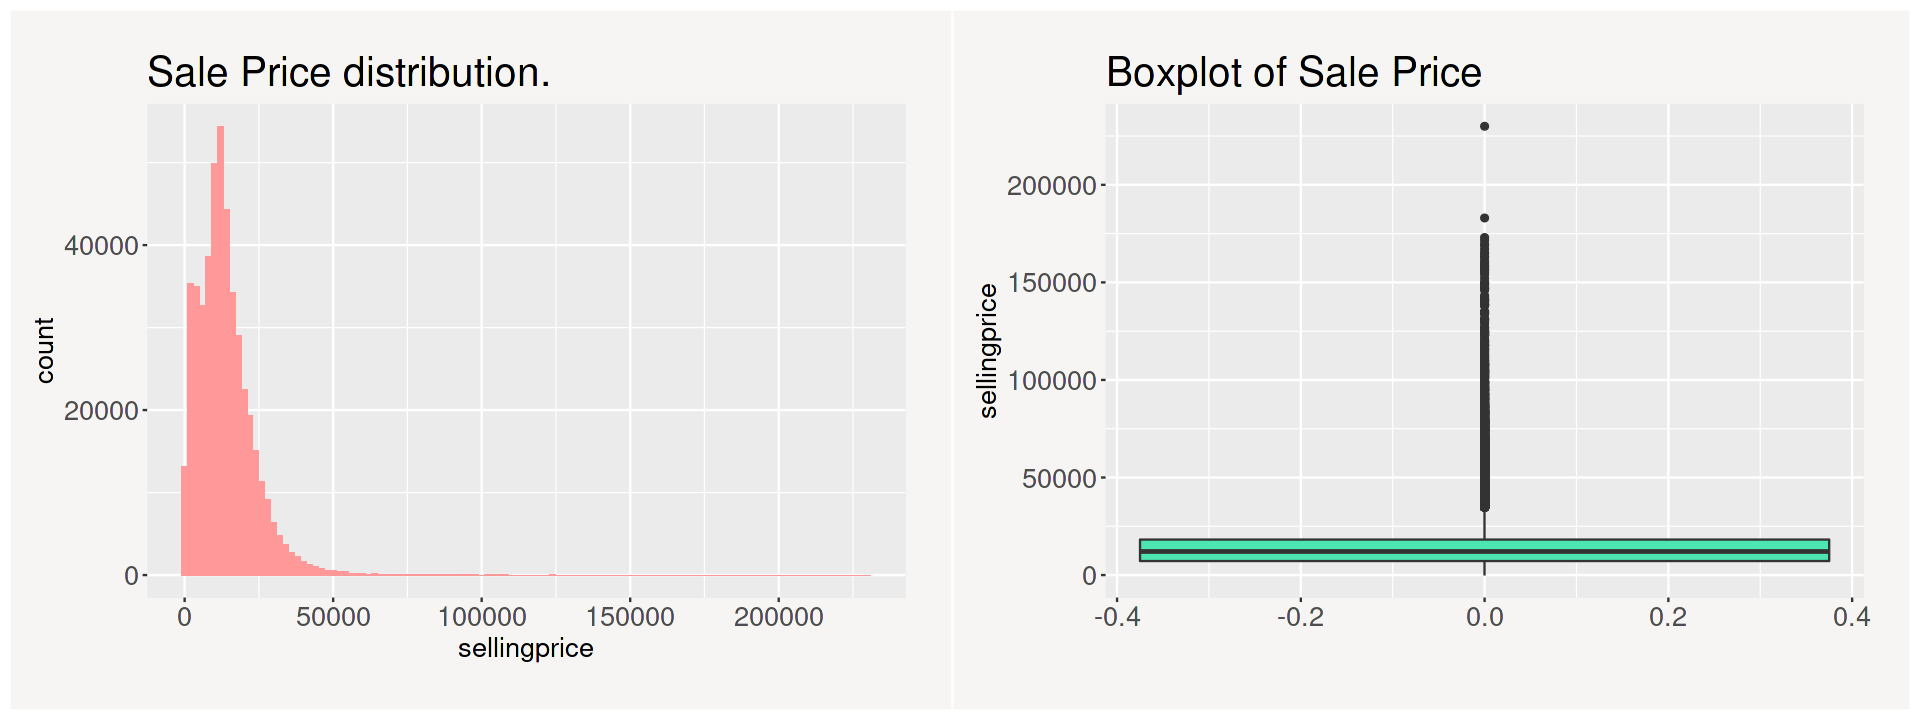

In [30]:
options(repr.plot.width = 16, repr.plot.height = 6)
hist <- ggplot(cars, aes(x = sellingprice )) + 
        geom_histogram(binwidth=2000, fill='#FF9999')+
        labs(title ="Sale Price distribution. ")+
        theme

box <- ggplot(cars, aes( y = sellingprice ) ) +
        geom_boxplot(fill='#4DE5B1') + 
        labs(title ="Boxplot of Sale Price") +
        theme

hist + box

### Transmission

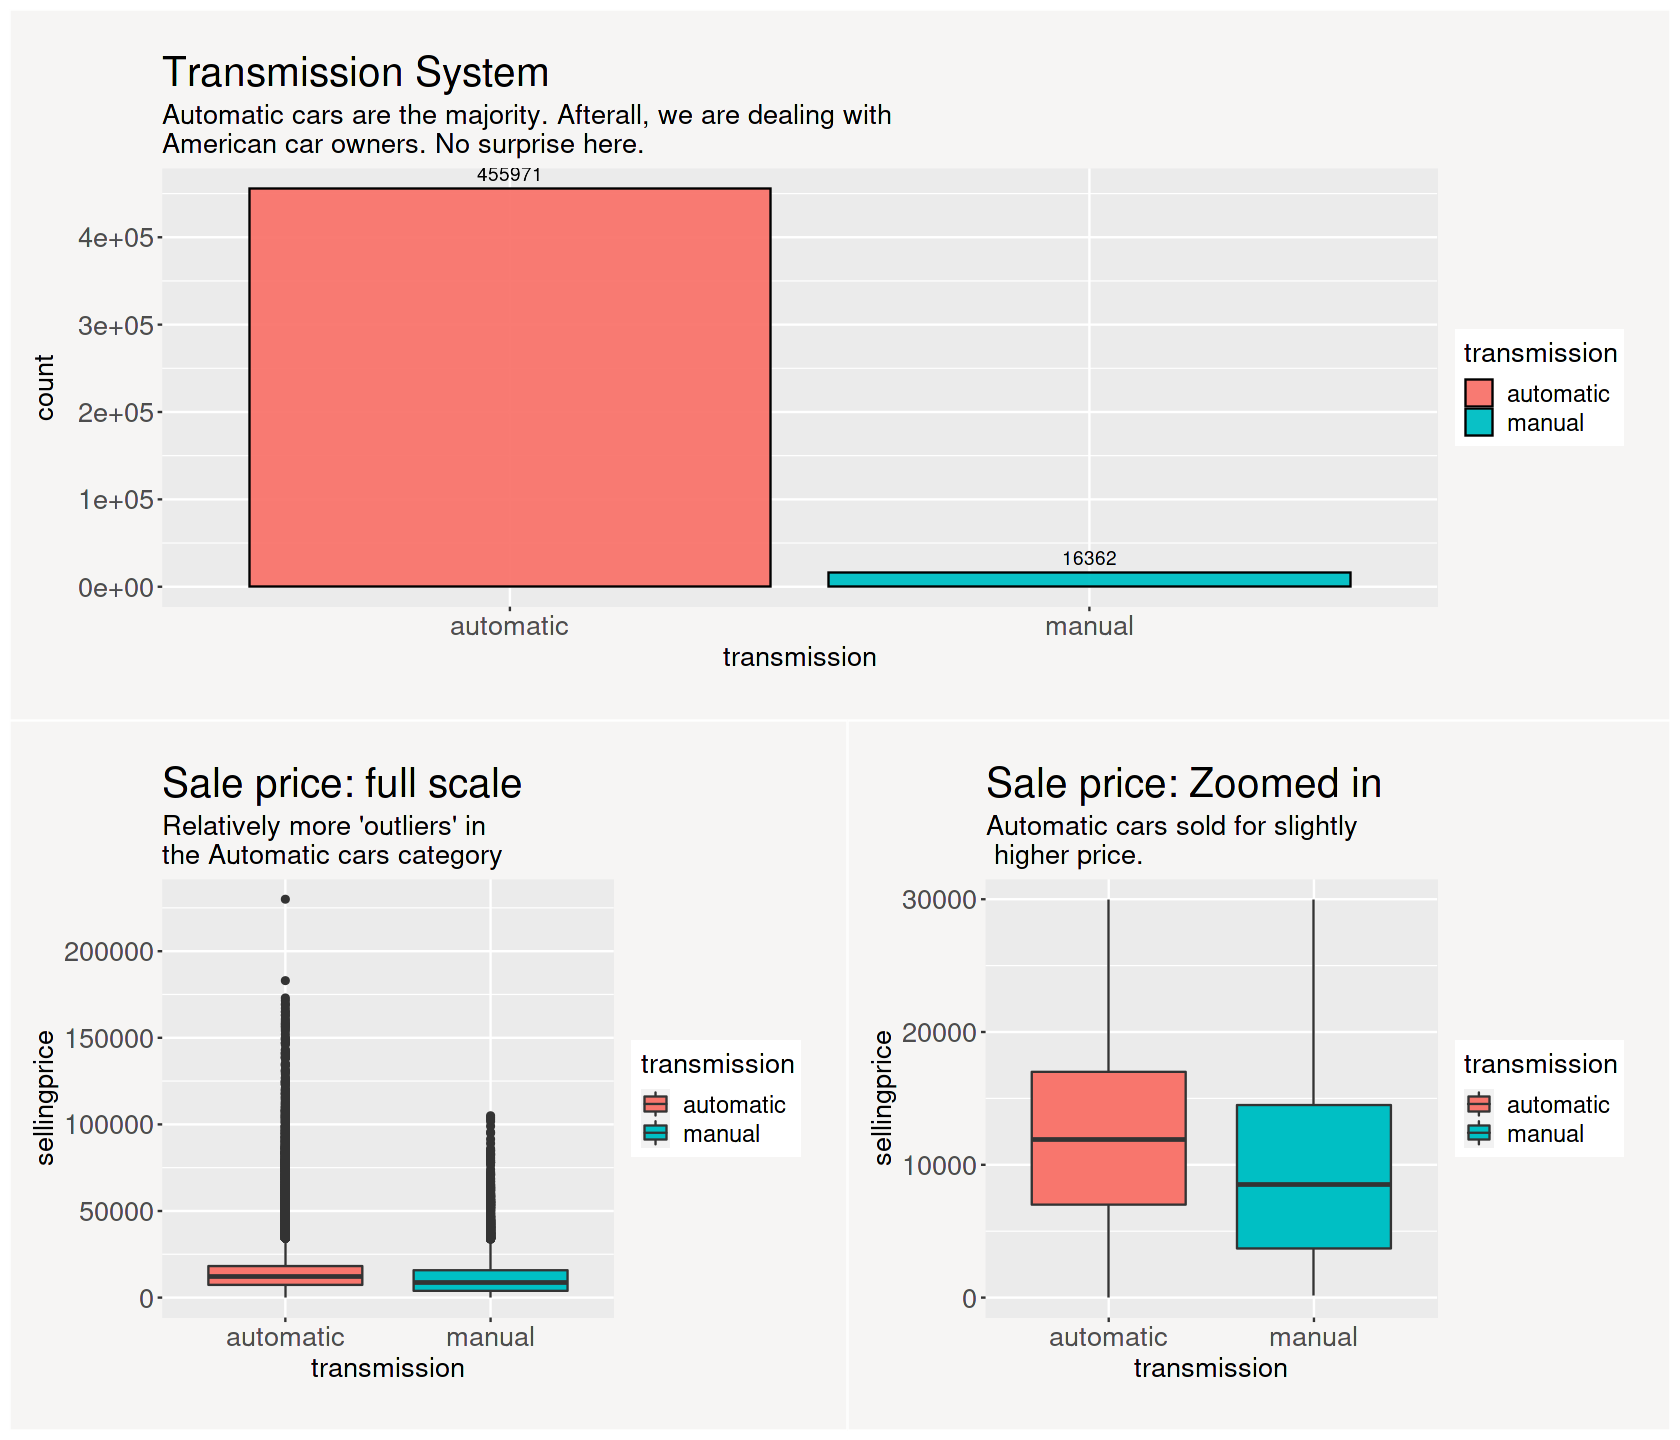

In [31]:
options(repr.plot.width = 14, repr.plot.height = 12)
bar <- ggplot(cars, aes(x = transmission, fill = transmission )) + 
        geom_bar(stat ='count', color='#000000' , alpha=0.96)+
        geom_text(aes(label=..count..),stat='count', position=position_dodge(0.9),vjust=-0.5, color='black')+
        labs(title="Transmission System", subtitle ="Automatic cars are the majority. Afterall, we are dealing with\nAmerican car owners. No surprise here." )+
        theme +
        theme(axis.text.x = element_text(angle = 0, hjust=0.5))

box1 <- ggplot(cars, aes(x = transmission, y = sellingprice, fill = transmission)) +
        geom_boxplot()+
        labs(title="Sale price: full scale", subtitle ="Relatively more 'outliers' in\nthe Automatic cars category" )+
        theme 

box2 <- ggplot(cars, aes(x = transmission, y = sellingprice, fill = transmission)) +
        geom_boxplot()+
        labs(title="Sale price: Zoomed in", subtitle ="Automatic cars sold for slightly\n higher price." )+
        theme + ylim(0, 30000)
               
bar /( box1  + box2)

### MMR (Manhiem Market Report)
* MMR, which is short for the Manheim Market Report, is a specific report that’s available to auto wholesalers.
* MMR provides data about the wholesale prices of vehicles for the past 13 months. All of this data is generated by real vehicle sales at the Manheim auction houses found throughout the country.
* Since MMR gathers data based on its own sales, it can be considered to be quite accurate. Every sale made at an auction house in the Manheim network is tracked, analyzed, and used when someone generates a report for the same vehicle. [Ref](https://joinyaa.com/guides/what-are-mmr-values/)

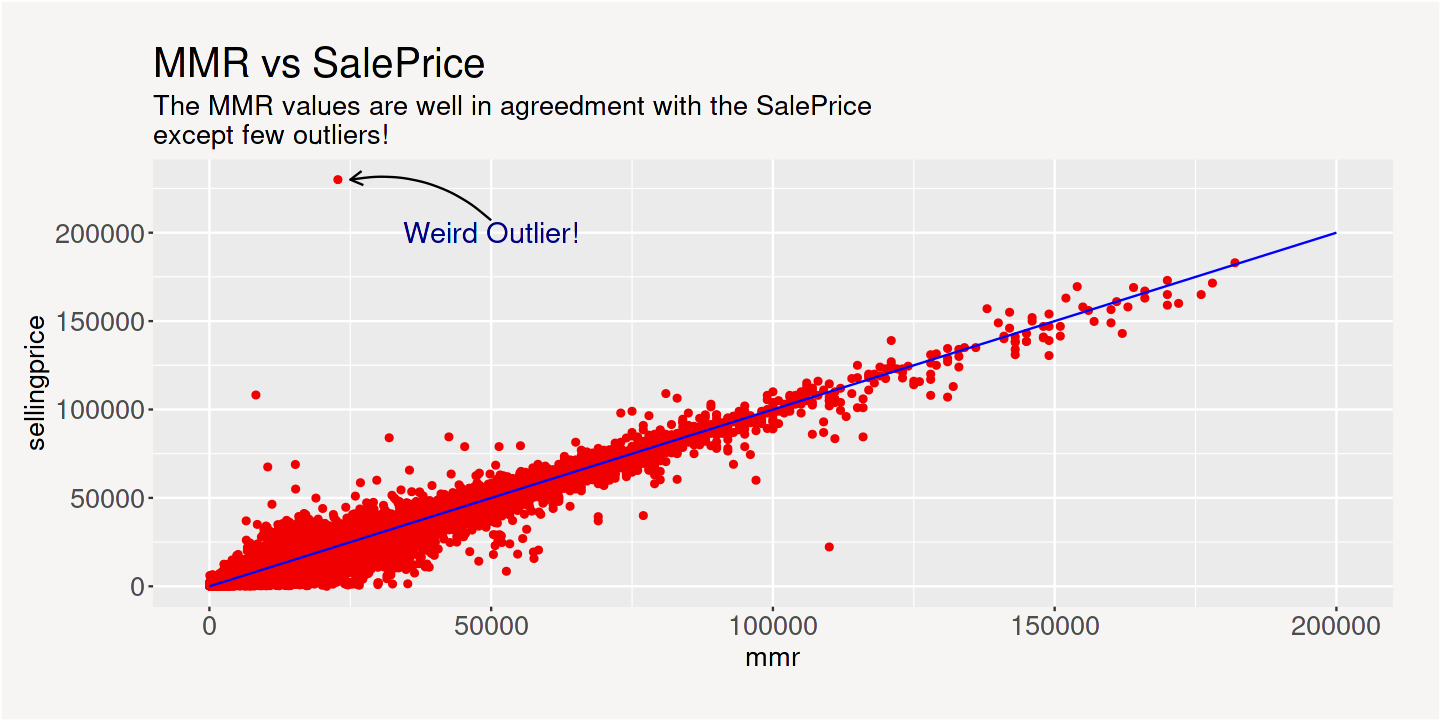

In [32]:
options(repr.plot.width = 12, repr.plot.height = 6)
ggplot(head(cars,nrow(cars)), aes(x =mmr, y =sellingprice, na.rm =TRUE)) + 
        geom_point(color='#f00000')+
        labs(title='MMR vs SalePrice', subtitle = 'The MMR values are well in agreedment with the SalePrice\nexcept few outliers!')+
        annotate(geom = "curve", x = 50000, y = 207000, xend = 25000, yend = 230000, curvature = 0.25,   
                 arrow = arrow(length = unit(3, "mm")))+
        annotate(geom = "segment", x = 0, xend = 200000, y = 0, yend = 200000, color='blue')+
        annotate(geom='text', x=50000, y=200000, label='Weird Outlier!', size=6, color='navyblue')+        
        theme   

### Investigating the outliers in the above plot
* We notice that the 'weird outlier' is a Ford Escape car which has a mmr value of 22800. Selling price seems to be wrong by one **ZERO**. Possible data entry error?
* The same thing could be said about the other Ford Esape car which had a mmr value of `$8250` but 'sold' for `$108200`.
* The third one is difficult to call. May be something happened to the car after the mmr valuation and was sold for lower price? The brand new car of this model is about **150grand** in today's market. 


In [33]:
filter(cars, sellingprice > 100000 & mmr < 25000)
filter(cars, (sellingprice < 50000) & (mmr > 100000))

year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2010,Ford,Escape,XLT,Suv,automatic,1fmcu0d77aka54695,OH,3.7,82985,red,gray,pat obrien chevrolet south,8250,108200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
2014,Ford,Escape,Titanium,Suv,automatic,1fmcu9j98eua23833,MO,4.3,27802,green,tan,ford-lincoln dealer program,22800,230000,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)


year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2013,Mercedes-Benz,G-Class,G63 AMG,Suv,automatic,wdcyc7df0dx200577,PA,4.8,23947,black,black,adcock brothers inc,110000,22250,Fri Mar 20 2015 02:00:00 GMT-0700 (PDT)


### Some selected high-priced cars

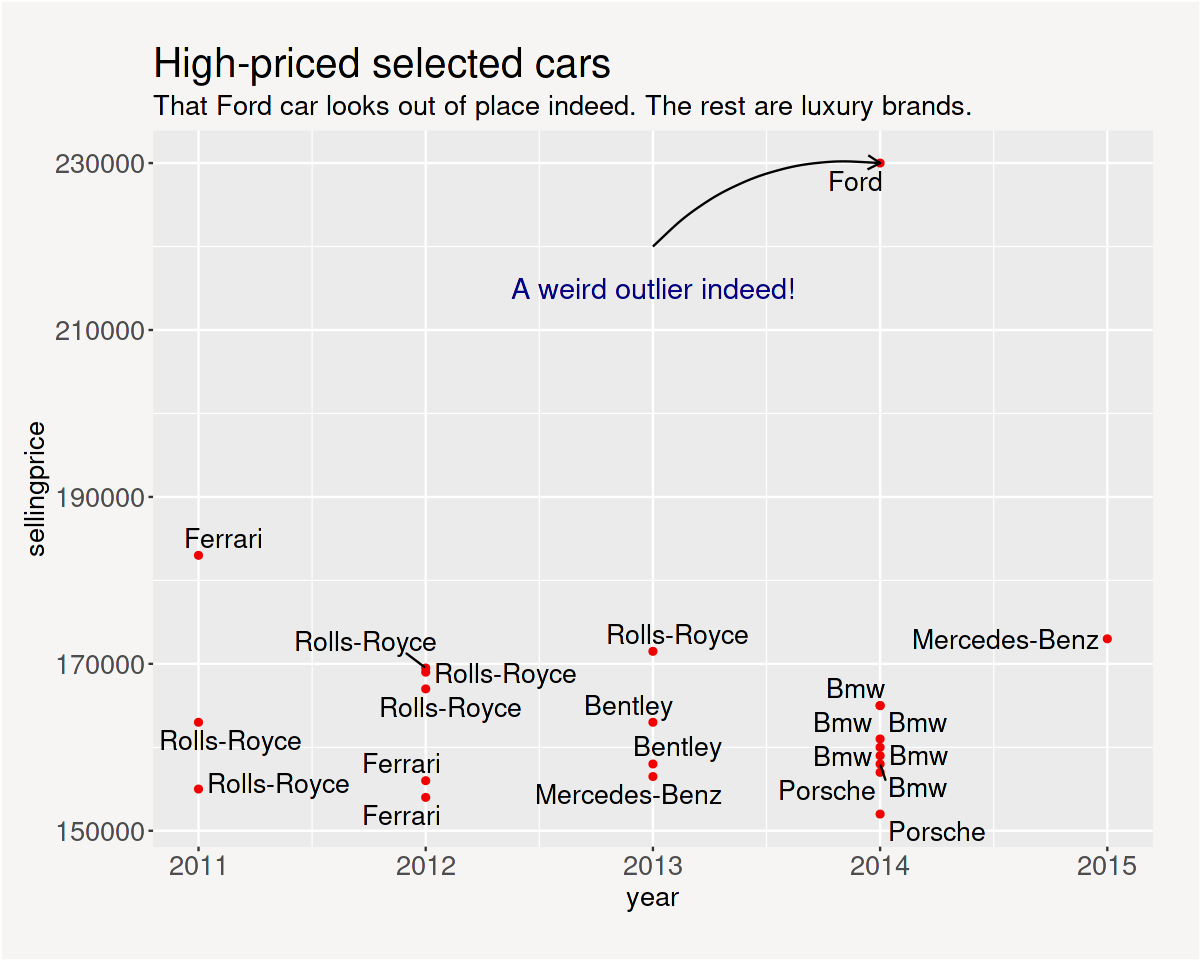

In [34]:
options(repr.plot.width = 10, repr.plot.height = 8)
df <- filter(cars, sellingprice > 150000)

p10<-ggplot(df, aes(x = year, y =sellingprice, label = make)) + 
        geom_point(color='#f00000')+
        geom_text_repel(aes(label = make), size=5.5)+
        labs(title='High-priced selected cars', subtitle='That Ford car looks out of place indeed. The rest are luxury brands.')+
        annotate(geom = "curve", x = 2013, y = 220000, xend = 2014, yend = 230000, curvature = -0.25,   
                 arrow = arrow(length = unit(3, "mm")))+
        annotate(geom='text', x=2013, y=215000, label='A weird outlier indeed!', size=6, color='navyblue')+       
        theme 
p10

### Odometer
* Odometer or millage is one of the most important feature buyers would be interested in while buying a used car.
* Generally the fewer km's on the odometer of a used car means a higher selling price. In some special circumstances however people may pay more/less regardless of the odometer reading. 
* Let see what the trend in this dataset is.

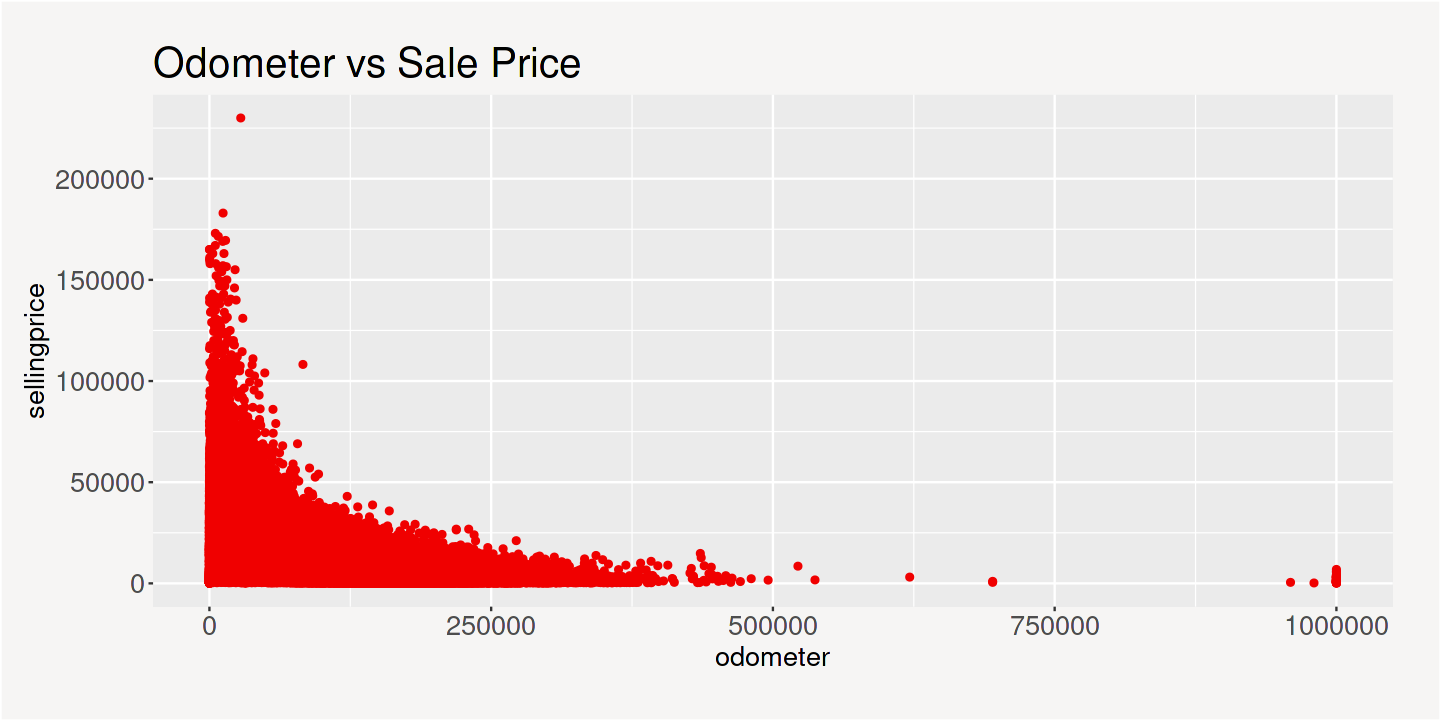

In [35]:
options(repr.plot.width = 12, repr.plot.height = 6)
ggplot(cars, aes(x =odometer, y =sellingprice, na.rm =TRUE)) + 
        geom_point(color='#f00000')+
        labs(title='Odometer vs Sale Price')+
        theme        

### Car's condition
* Buyers of a used-car *rightly* put huge importance on the conditions of the car. No one would like to put more money in than the price of the car on maintenance and upgrade. So the state of the car is vital. 
* The graphs below show that there is a clear correlation between car's condition and the sale price. The correlation is clearer when we compare apples to apples, i.e same car models of the same year with reasonably small window of odometer readings. 

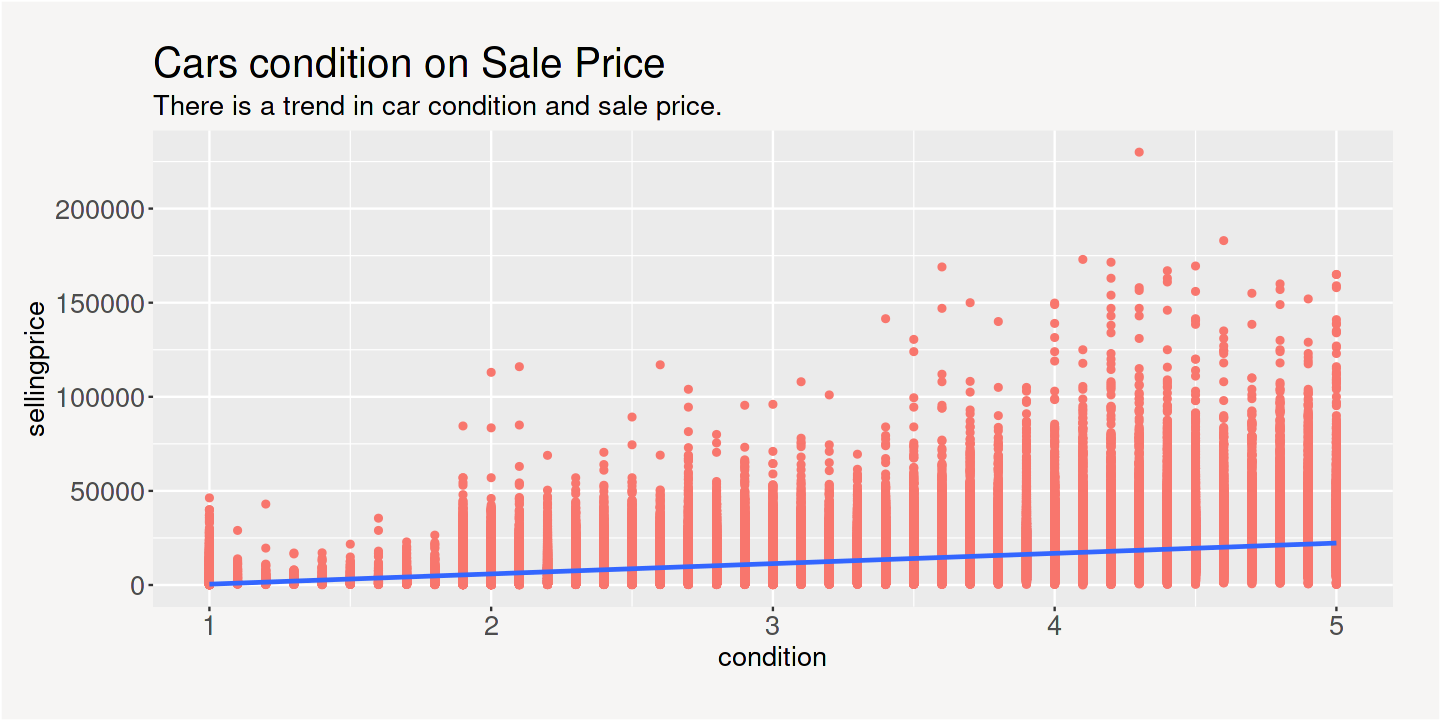

In [36]:
options(repr.plot.width = 12, repr.plot.height = 6)
ggplot(cars, aes(x =condition, y =sellingprice)) + 
        geom_point(color='#F8766D')+
        geom_smooth(formula = y ~ x, method = "lm")+
        labs(title= 'Cars condition on Sale Price', 
            subtitle = 'There is a trend in car condition and sale price.' )+
        theme

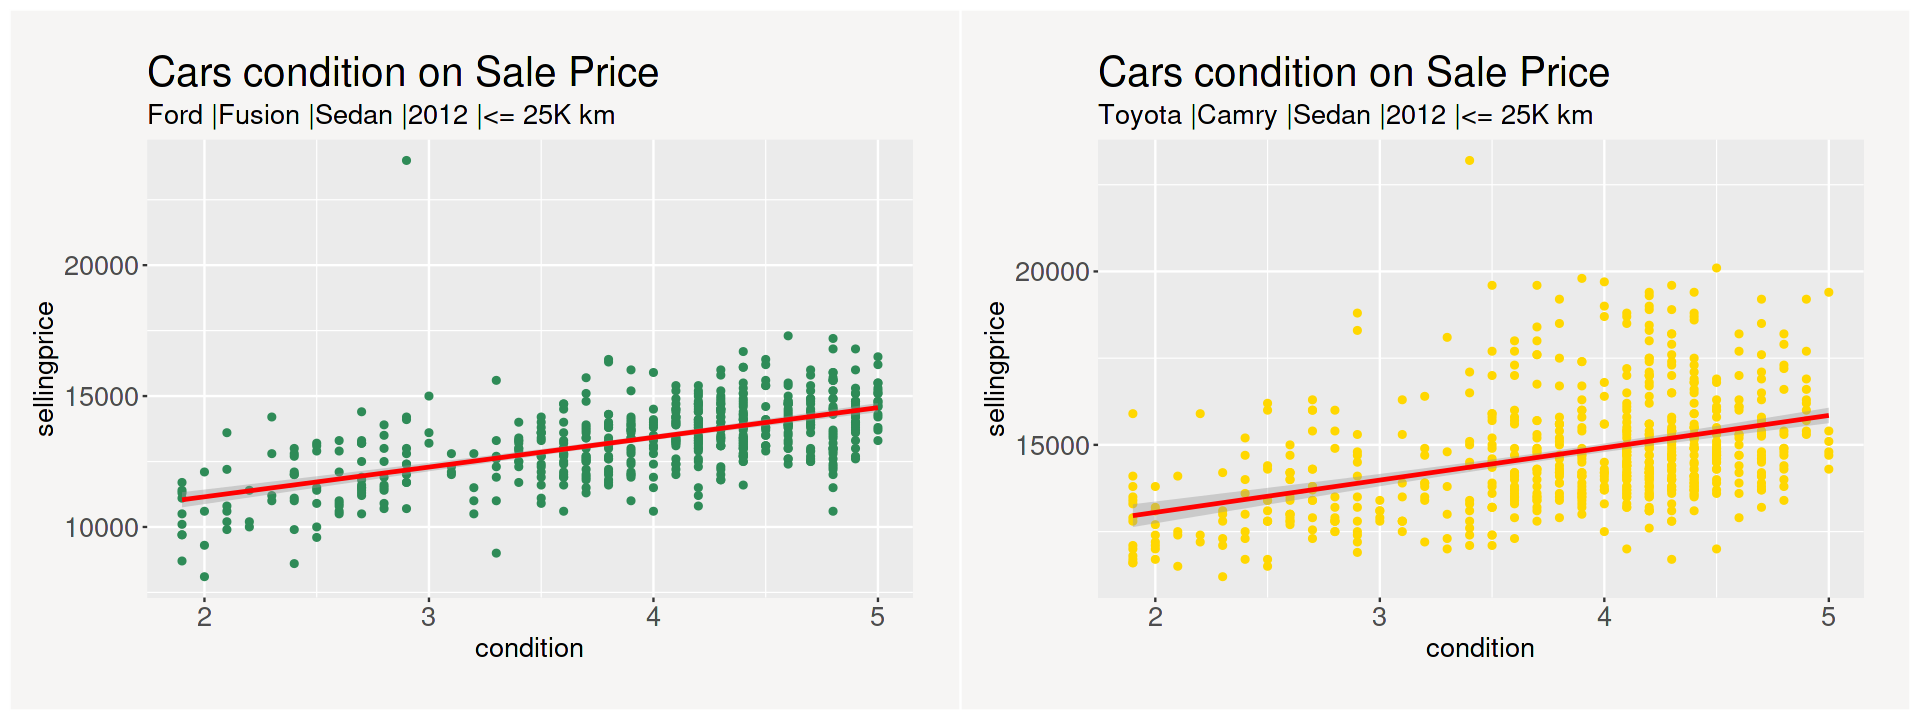

In [37]:
cars_ford_ <- filter(cars, make=='Ford' & model=='Fusion' & year=='2012' & body=='Sedan' & odometer <= 25000)
cars_toyota_ <- filter(cars, make=='Toyota' & model=='Camry' & year=='2012' & body=='Sedan' & odometer <= 25000)

options(repr.plot.width = 16, repr.plot.height = 6)
f <- ggplot(cars_ford_, aes(x =condition, y =sellingprice)) + 
        geom_point(color='seagreen')+
        geom_smooth(formula = y ~ x, method = "lm", color='red')+
        labs(title= 'Cars condition on Sale Price', 
            subtitle ="Ford |Fusion |Sedan |2012 |<= 25K km")+
        theme
t <- ggplot(cars_toyota_, aes(x =condition, y =sellingprice)) + 
        geom_point(color='gold')+
        geom_smooth(formula = y ~ x, method = "lm", color='red')+
        labs(title= 'Cars condition on Sale Price', 
            subtitle ="Toyota |Camry |Sedan |2012 |<= 25K km")+
        theme
f + t

### Year
* The model year of a car can also be a selling point. Latest car models can sale for higher price given the condition of the car is good. 
* We see from the graph below that on average the price increases as the model year get more recent. 
* We also see that cars of the early 80's sold for higher prices. These are possibly skwed average prices due to the presence of top brand cars.

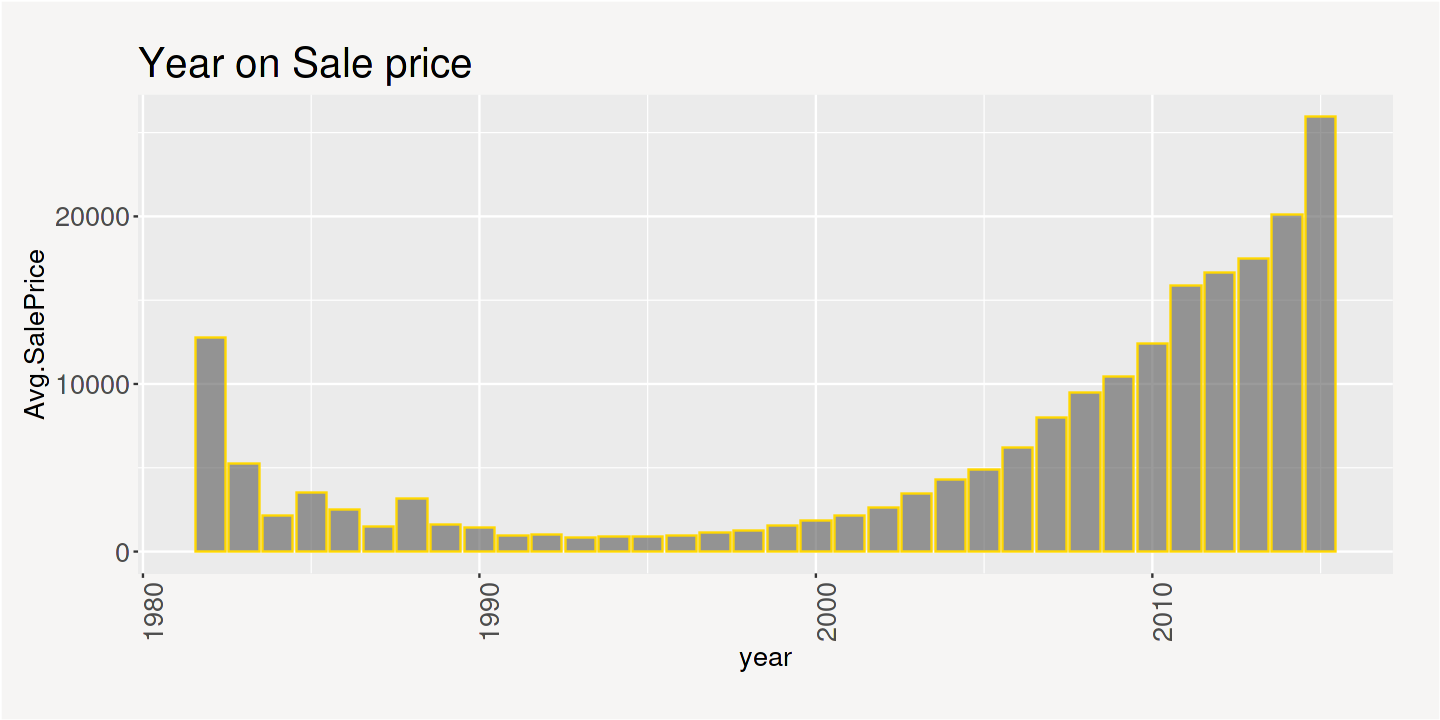

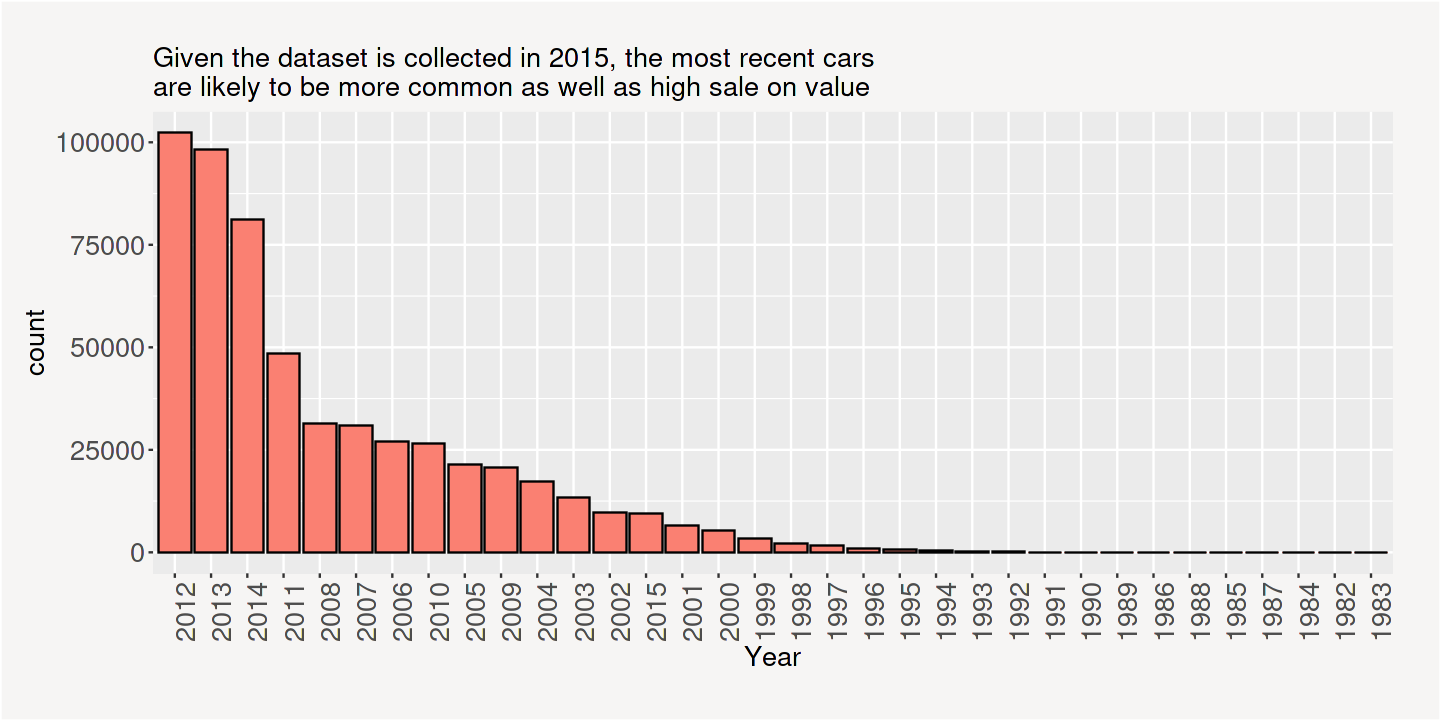

In [38]:
options(repr.plot.width = 12, repr.plot.height = 6)

df <- cars.year %>% group_by(year) %>%
        summarise(Avg.SalePrice = mean(sellingprice))

ggplot(df, aes(x = year, y = Avg.SalePrice)) + 
        geom_bar(stat= 'identity', alpha=0.6, color='gold')+
        labs(title="Year on Sale price" )+
        theme +
        theme(axis.text.x = element_text(angle = 90, hjust=0.5))


cars.year %>% 
    group_by(year) %>% 
    filter(!is.na(year)) %>%
    summarise(count = n()) %>% 
    ggplot(aes(x = reorder(year,(-count)), y = count)) + 
        geom_bar(stat = 'identity', fill='salmon', color='black') + 
        labs(subtitle="Given the dataset is collected in 2015, the most recent cars\nare likely to be more common as well as high sale on value")+
        xlab('Year')+
        theme + theme(axis.text.x = element_text(angle = 90, hjust=0.5))

In [39]:
filter(cars.year, year < 1983)

year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1982,NA,NA,NA,NA,automatic,1g1ay0786c5123682,CA,2,85738,gold,gray,livermore toyota and livermore scion,6175,5000,Wed Jan 28 2015 04:30:00 GMT-0800 (PST)
1982,NA,NA,NA,NA,automatic,wdbba45a0cb017970,PA,4,18404,white,gray,adcock brothers inc,3675,20500,Thu Jun 11 2015 02:00:00 GMT-0700 (PDT)


### Make (brand)

In [40]:
# let's sort out the naming inconsistency that we saw earlier
cars_new <- cars %>%
    mutate(make = replace(make, (make == 'Mercedes-B'| make == 'Mercedes'), 'Mercedes-Benz')) %>%
    mutate(make = replace(make, make == "Vw" ,"Volkswagen"))%>%
    mutate(make = replace(make, make == "Landrover", "Land Rover"))%>%
    mutate(make = replace(make, (make == "Ford Truck" | make == "Ford Tk"), "Ford"))%>%
    mutate(make = replace(make, make == "Chev Truck", "Chevrolet"))%>%
    mutate(make = replace(make, make == "Mazda Tk", "Mazda"))%>%
    mutate(make = replace(make, make == "Gmc Truck", "Gmc"))%>%
    mutate(make = replace(make, (make == "Dodge Tk"), "Dodge"))%>%
    mutate(make = replace(make, make == "Hyundai Tk", "Haundai"))


Selecting by Avg.SalePrice

Selecting by freq



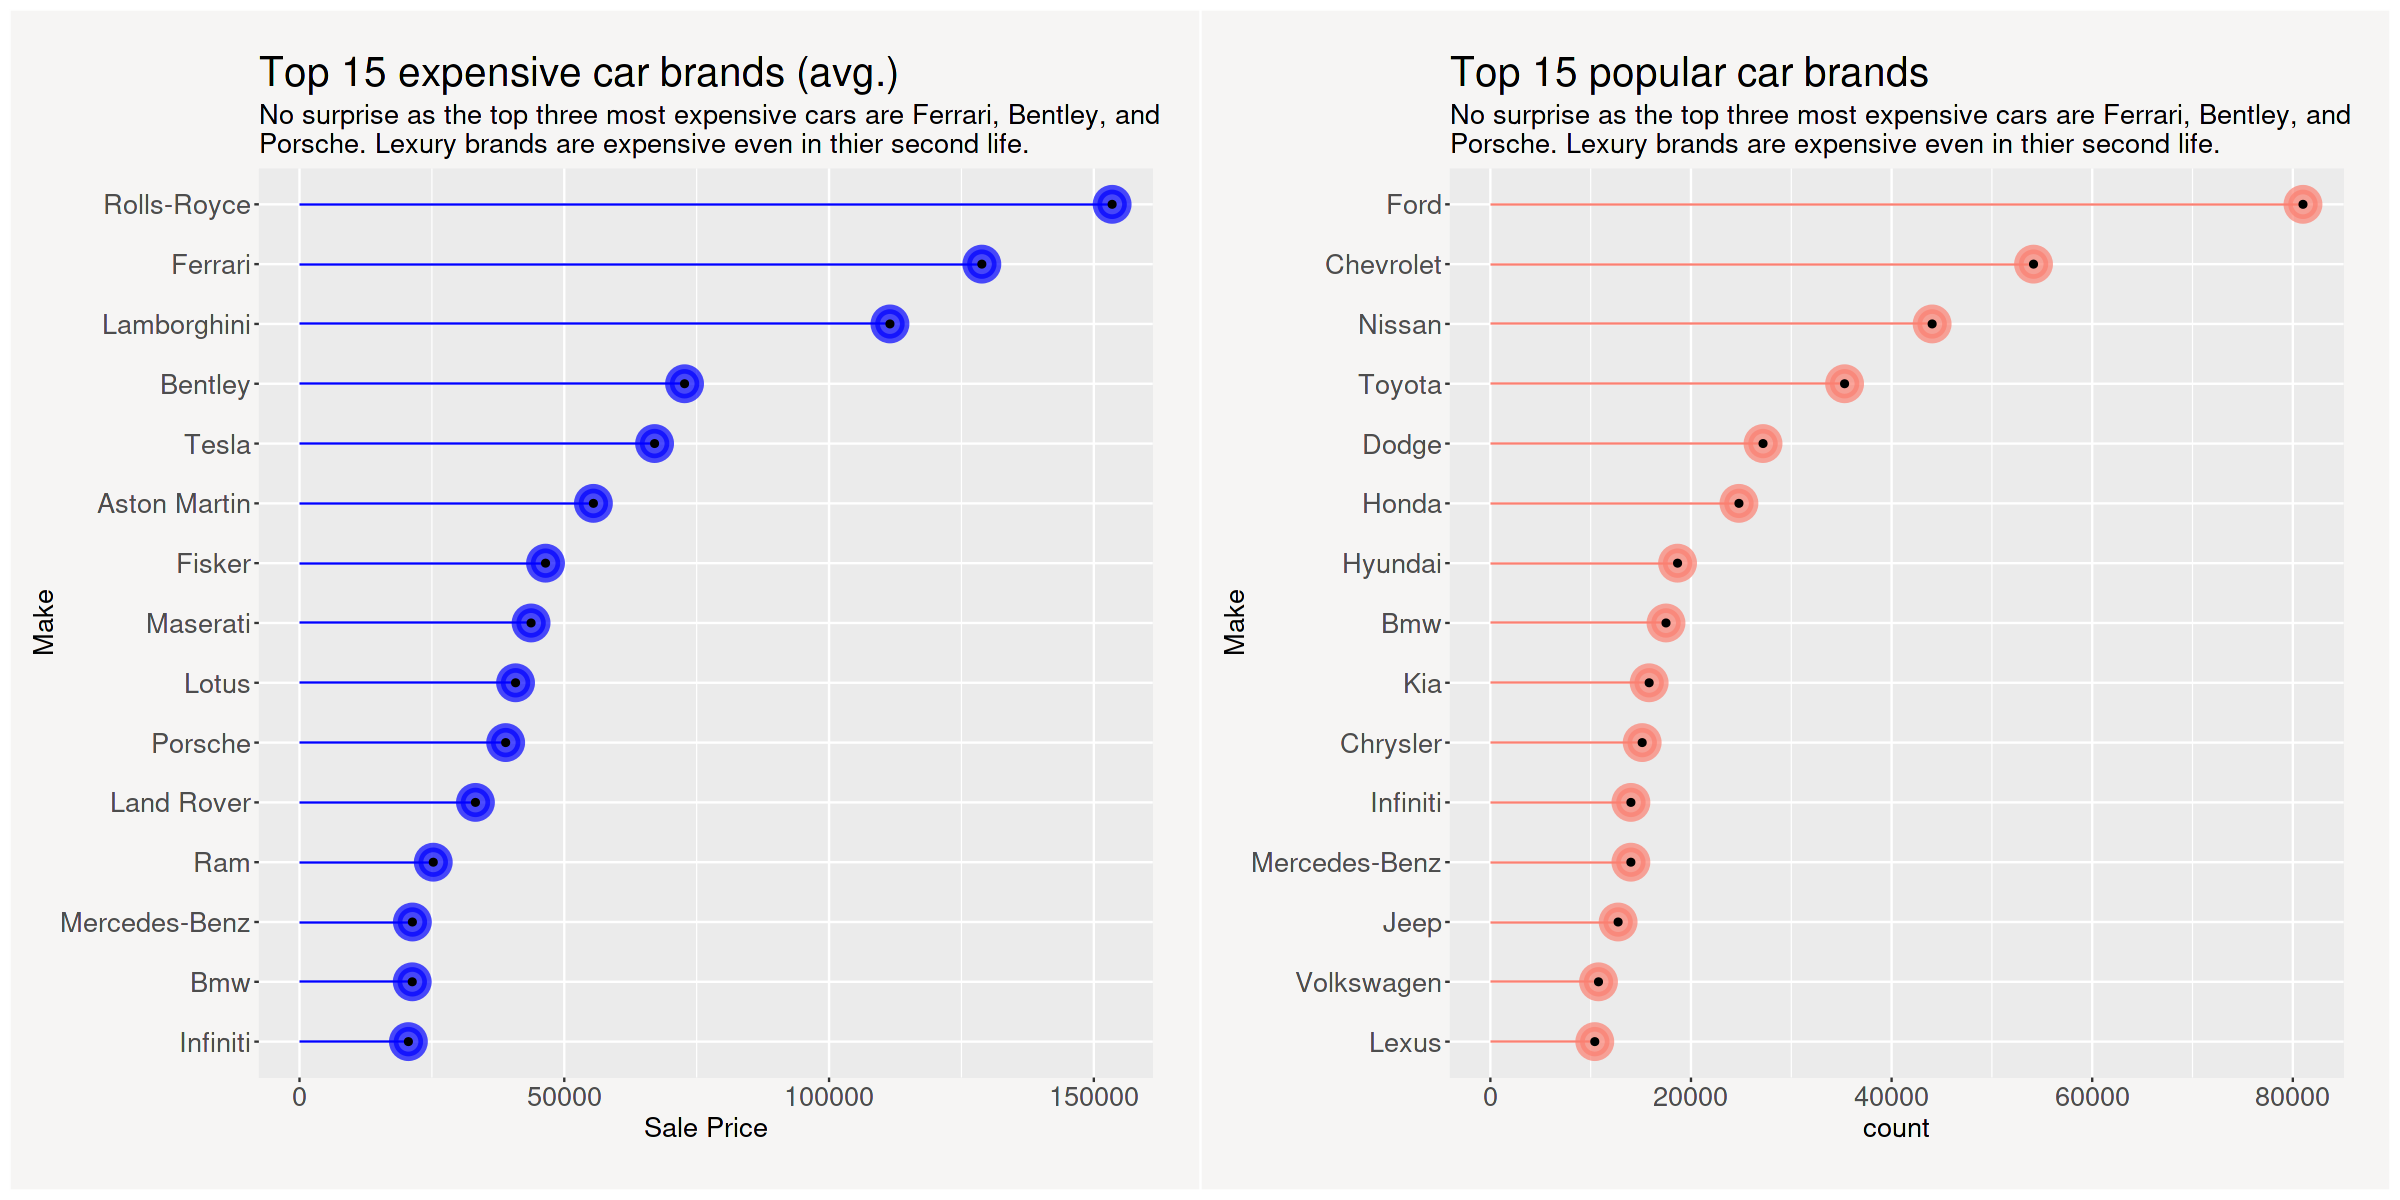

In [41]:
options(repr.plot.width = 20, repr.plot.height = 10)

df <- cars_new %>% group_by(make) %>%
      summarise(Avg.SalePrice = mean(sellingprice)) %>%
      arrange(desc(Avg.SalePrice)) %>%
      top_n(15)

p1<-ggplot(df, aes(x = Avg.SalePrice,y = reorder(make, Avg.SalePrice))) +
        geom_segment(aes(x = 0, reorder(make, Avg.SalePrice), xend = Avg.SalePrice, yend = make), color = "blue", thickness=10) +
        geom_point( size=10, color="blue", fill=alpha("orange", 0.3), alpha=0.7, shape=20, stroke=3)+
        labs(title="Top 15 expensive car brands (avg.)", subtitle ='No surprise as the top three most expensive cars are Ferrari, Bentley, and\nPorsche. Lexury brands are expensive even in thier second life.')+
        xlab('Sale Price') + ylab('Make')+
        geom_point() + theme 

df <- cars_new %>% group_by(make) %>% 
      summarise(freq = n()) %>% 
      arrange(desc(freq)) %>%
      top_n(15) 

p2<-ggplot(df, aes(y = reorder(make,(freq)), x = freq)) +
        geom_segment(aes(x = 0, reorder(make, freq), xend = freq, yend = make), color = "salmon", thickness=10) +
        geom_point( size=10, color="salmon", fill=alpha("orange", 0.3), alpha=0.7, shape=20, stroke=3)+
        labs(title="Top 15 popular car brands ", subtitle ='No surprise as the top three most expensive cars are Ferrari, Bentley, and\nPorsche. Lexury brands are expensive even in thier second life.')+
        xlab('count') + ylab('Make')+
        geom_point() + theme 
p1 + p2

<a href="#toc">Back to top</a>

### Model and body: Selected brands (luxury cars + most popular ones)
* The dataset contains a lot of brands and models. As a result it makes the notebook lengthy as well as boring to analyze model by model. For that reason we shall make two groups of cars, i.e the luxury car brands and the most common ones (the popular ones). 
* I have selected Ford, Chevy and Toyota as the popular cars and Ferrari, Rolls-Royce and Lamborghini the luxury ones. 


In [42]:
cars_ford <- filter(cars, make=='Ford' )
cars_chev <- filter(cars, make=='Chevrolet')
cars_toyota <- filter(cars, make=='Toyota' )
cars_luxury <- filter(cars, (make=='Rolls-Royce' | make=='Ferrari'| make=='Lamborghini'))#| make=='Tesla' | make == 'Lotus'|
                             #make == 'Porsche'| make=='Bentley' | make=='Aston Martib'| make=='Fisker'| make=='Maserati'))

### Top 3 Luxury Cars (on average price)
* 458 Italia (Ferrari) is the most expensive car model
* Ghost (Rolls-Royce) and california (Ferrari) are the 'most' common ones
* Coupe and Convertibles dominat the body type followed by sedan

Selecting by Avg.SalePrice

Selecting by freq



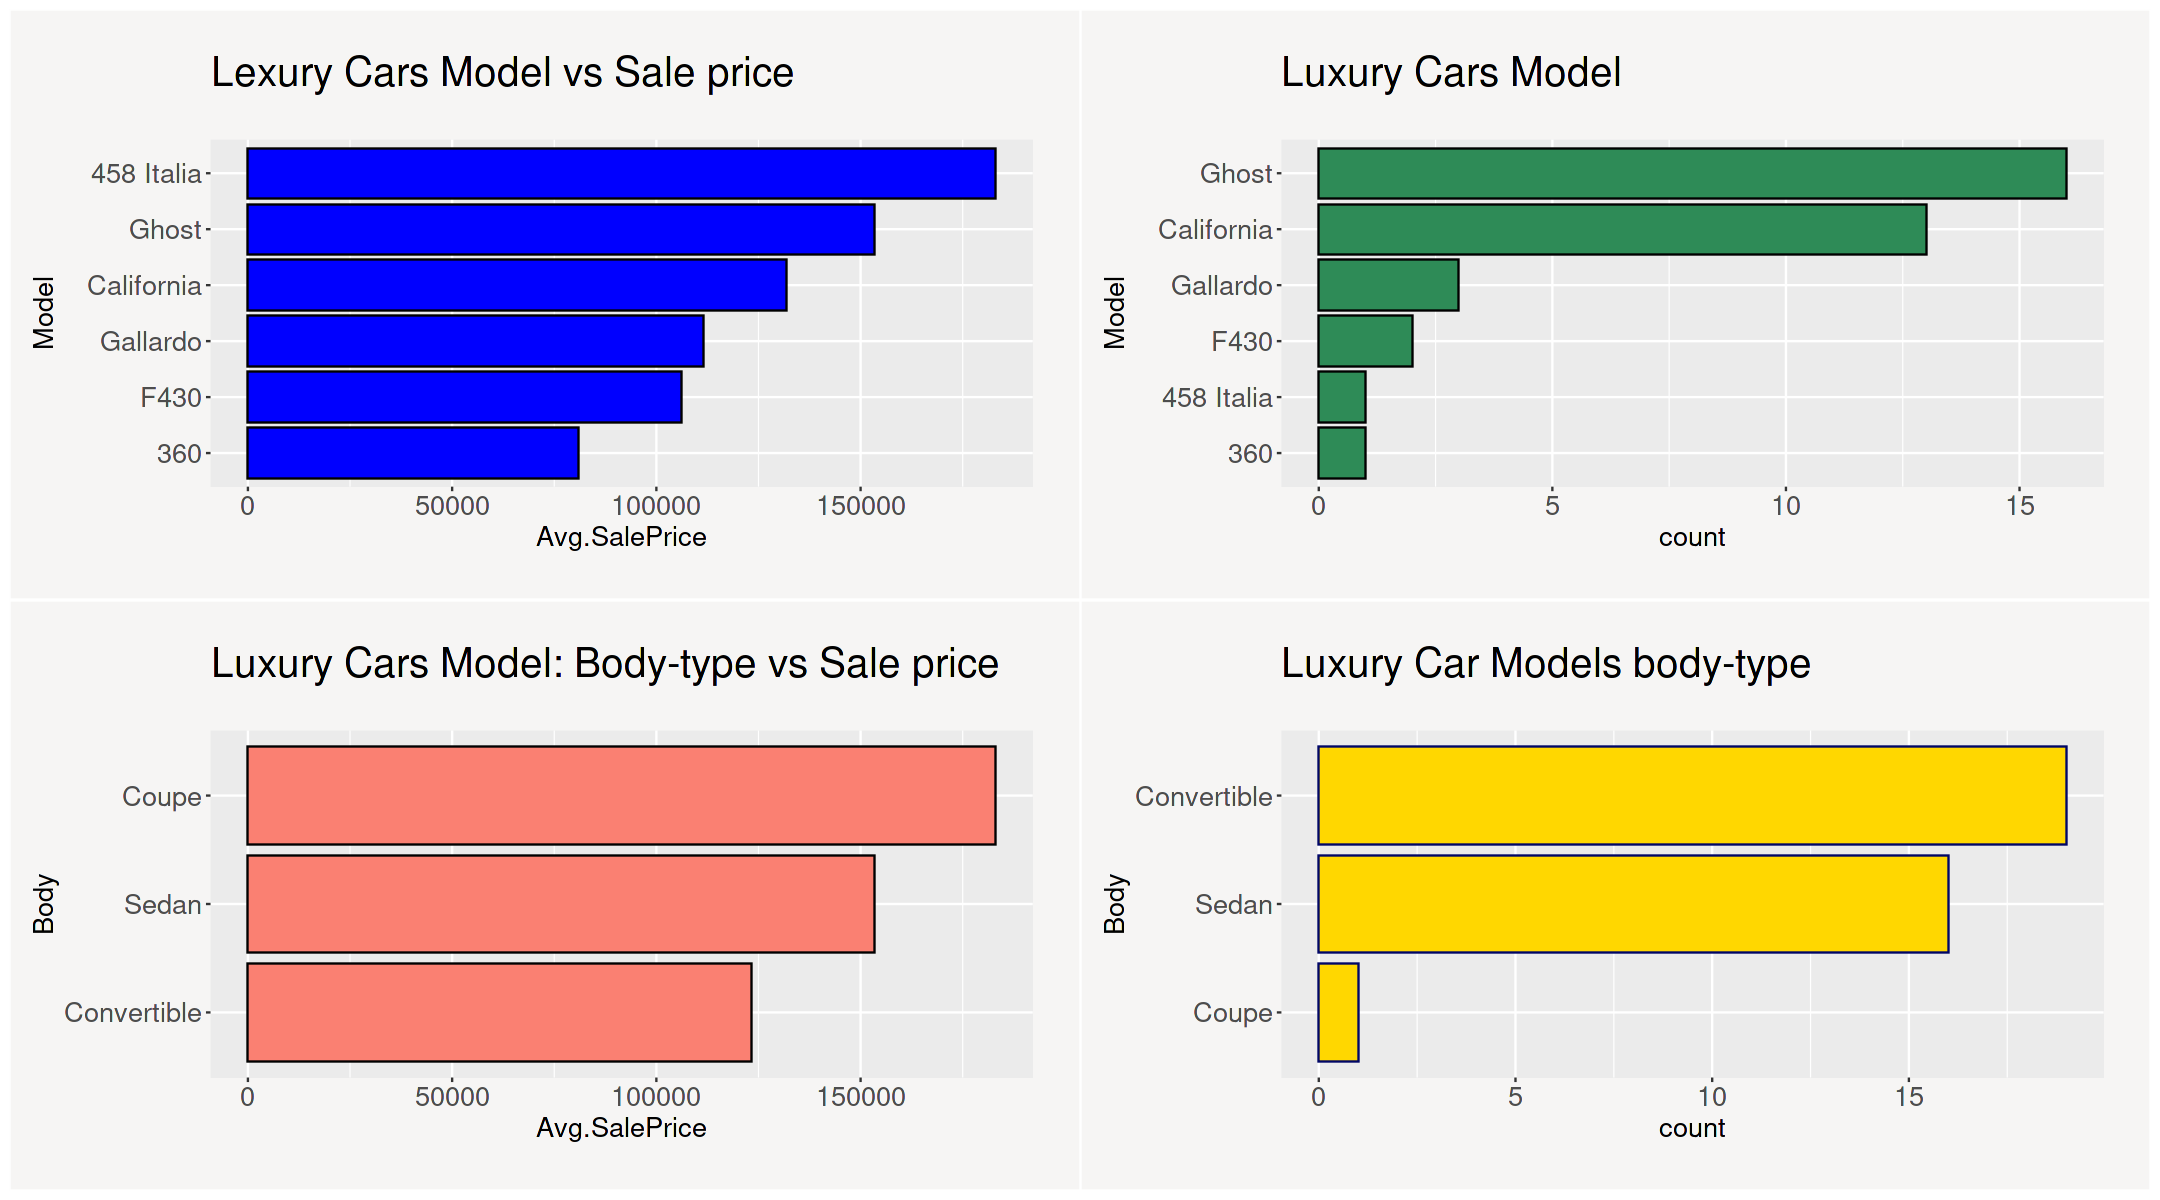

In [43]:
options(repr.plot.width = 18, repr.plot.height = 10)

df <- cars_luxury %>% group_by(model) %>%
      summarise(Avg.SalePrice = mean(sellingprice))%>%
      arrange(desc(Avg.SalePrice))%>%
      top_n(15) 

p1<-ggplot(df, aes(y = reorder(model, Avg.SalePrice), x = Avg.SalePrice)) + 
        geom_bar(stat= 'identity', color= 'black', fill= 'blue')+
        labs(title="Lexury Cars Model vs Sale price" )+ ylab('Model') +
        theme +
        theme(axis.text.x = element_text(angle = 0, hjust=0.5))

df_ford <- cars_luxury %>% group_by(model) %>% 
           summarise(freq = n()) %>% 
           arrange(desc(freq))%>%
           top_n(15)
    
p2<-ggplot(df_ford, aes(y = reorder(model,(freq)), x = freq)) + 
        geom_bar(stat = 'identity', fill="seagreen", color='black') + 
        labs(title="Luxury Cars Model", subtitle= "")+ ylab('Model')+
        xlab('count')+
        theme + theme(axis.text.x = element_text(angle = 0, hjust=0.5))

###

df_pop <- cars_luxury %>% group_by(body) %>% 
            summarise(freq = n())  
    
p3<-ggplot(df_pop, aes(y = reorder(body,(freq)), x = freq)) + 
        geom_bar(stat = 'identity', color="#000666", fill='gold') + 
        labs(title="Luxury Car Models body-type", subtitle= "")+ xlab('count')+
        ylab('Body')+
        theme + theme(axis.text.x = element_text(angle = 0, hjust=0.5))

df <- cars_luxury %>% group_by(body) %>%
      summarise(Avg.SalePrice = mean(sellingprice))

p4<-ggplot(df, aes(y = reorder(body, Avg.SalePrice), x = Avg.SalePrice)) + 
        geom_bar(stat= 'identity', color= 'black', fill='salmon')+
        labs(title="Luxury Cars Model: Body-type vs Sale price" )+ ylab('Body') +
        theme +
        theme(axis.text.x = element_text(angle = 0, hjust=0.5))
p1 + p2 + p4 + p3

### Ford

* Shelby Gt500 is the most expensive Ford model.
* Fusion followed by F150, Escape and Focus is the most popular Ford model.
* Sedan and Suv are the most popular body type whereas Transit Van followed by Crew Cab abd Supercrew are the pricier.

Selecting by Avg.SalePrice

Selecting by freq



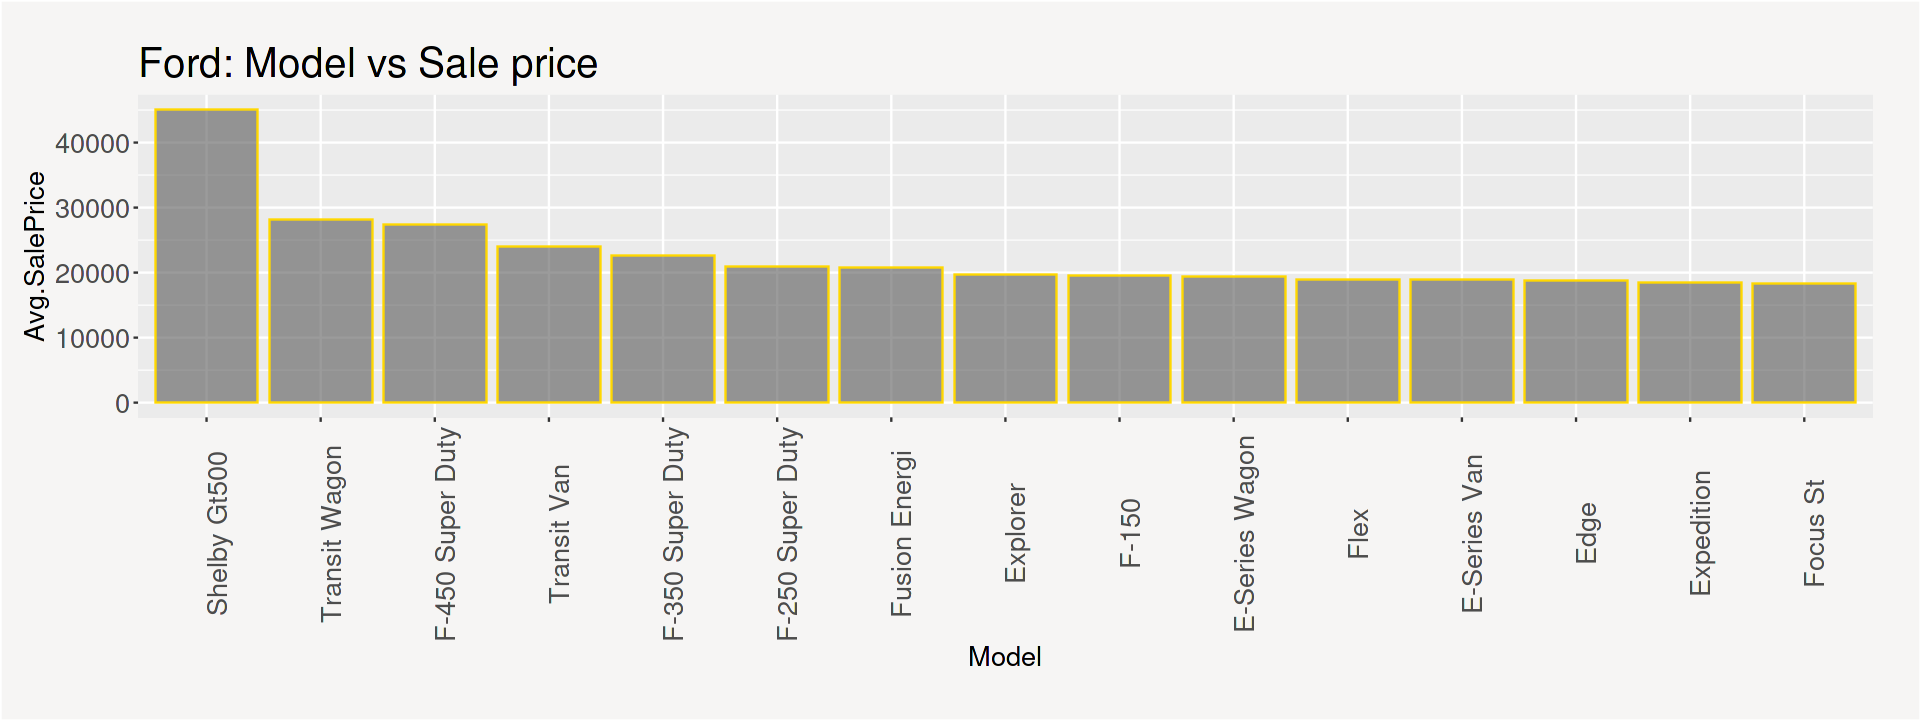

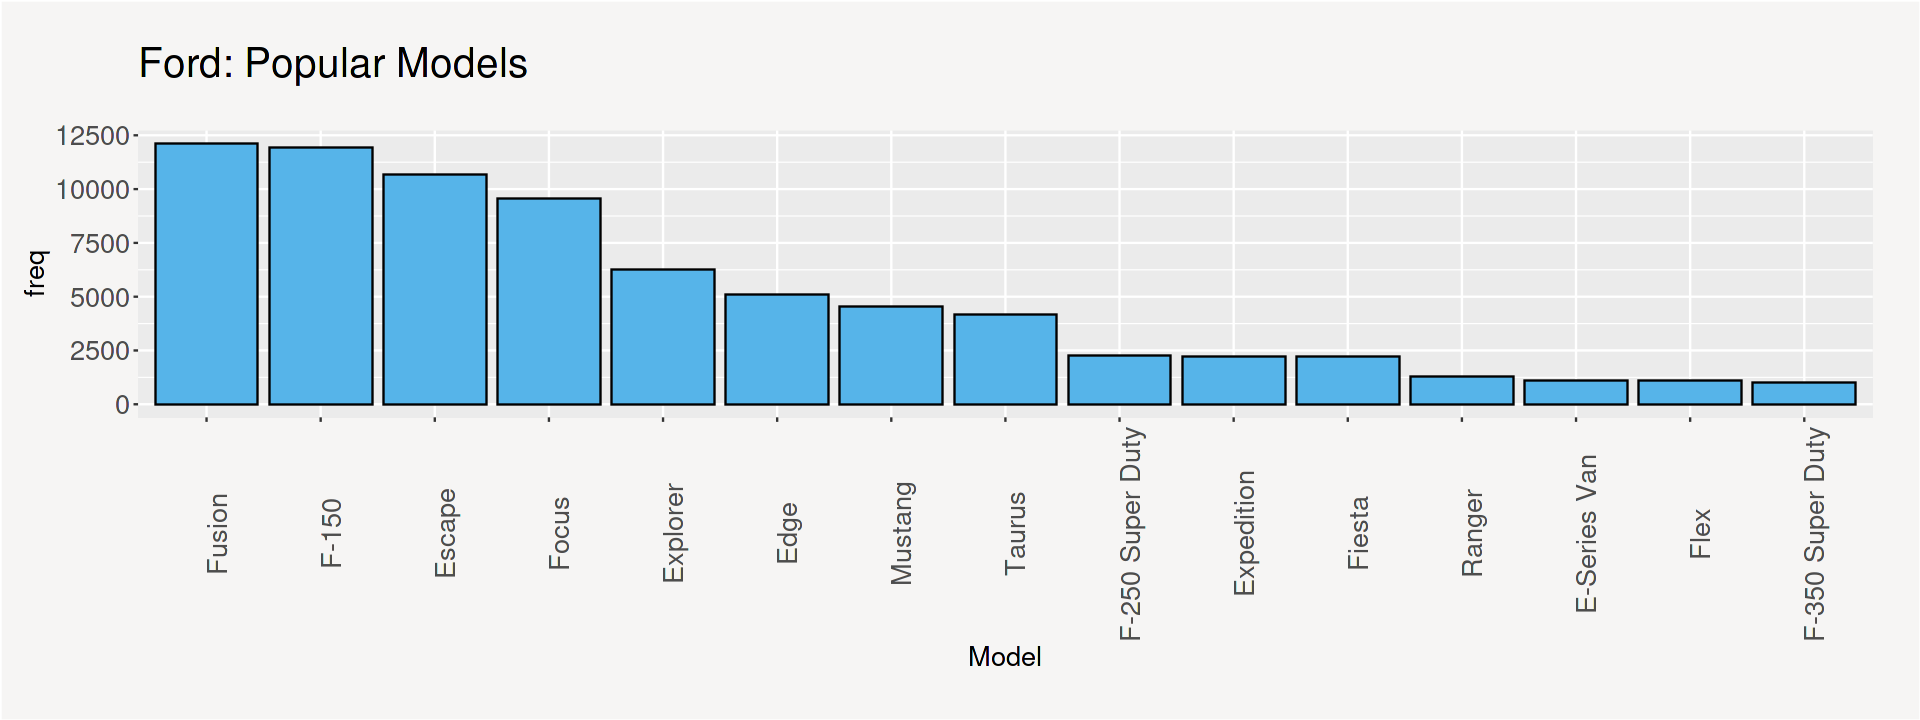

In [44]:
options(repr.plot.width = 16, repr.plot.height = 6)
df <- cars_ford %>% group_by(model) %>%
      summarise(Avg.SalePrice = mean(sellingprice))%>%
      arrange(desc(Avg.SalePrice))%>%
      top_n(15)

p1<-ggplot(df, aes(x = reorder(model, -Avg.SalePrice), y = Avg.SalePrice)) + 
        geom_bar(stat= 'identity', color= 'gold', alpha=0.6)+
        labs(title="Ford: Model vs Sale price" )+ xlab('Model')+
        theme +
        theme(axis.text.x = element_text(angle = 90, hjust=0.5))
p1

df_ford <- cars_ford %>% group_by(model) %>% 
           summarise(freq = n()) %>% 
           arrange(desc(freq))%>%
           top_n(15)
    
p2<-ggplot(df_ford, aes(x = reorder(model,(-freq)), y = freq)) + 
        geom_bar(stat = 'identity', fill="#56B4E9", color='black') + 
        labs(title="Ford: Popular Models", subtitle= "")+
        xlab('Model')+
        theme + theme(axis.text.x = element_text(angle = 90, hjust=0.5))
p2

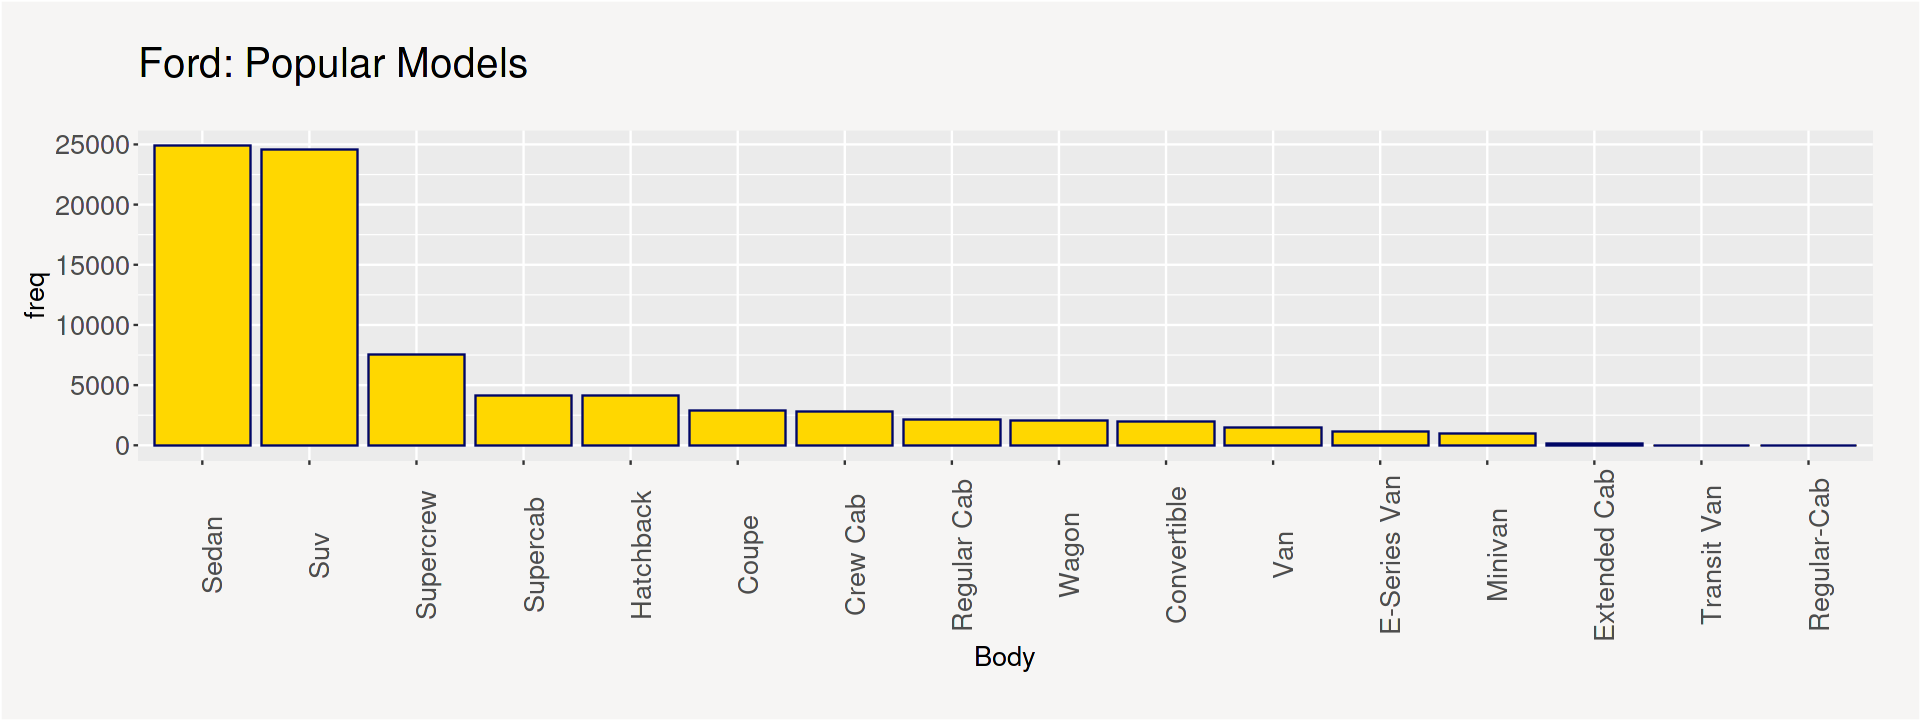

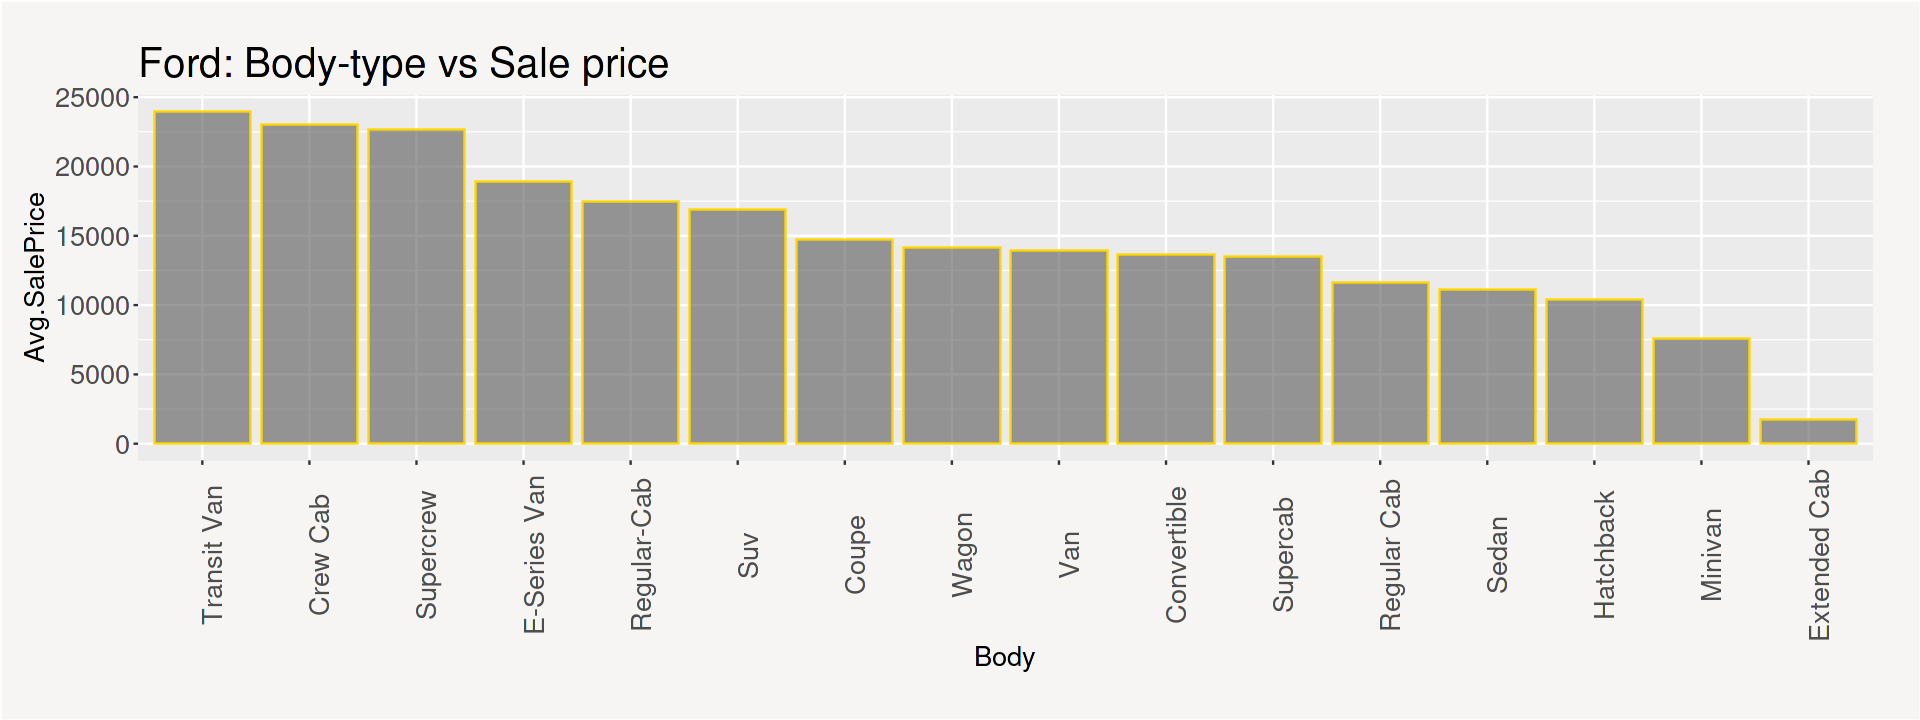

In [45]:
df_ford <- cars_ford %>% group_by(body) %>% 
            summarise(freq = n())  
    
p3<-ggplot(df_ford, aes(x = reorder(body,(-freq)), y = freq)) + 
        geom_bar(stat = 'identity', color="#000666", fill='gold') + 
        labs(title="Ford: Popular Models", subtitle= "")+
        xlab('Body')+
        theme + theme(axis.text.x = element_text(angle = 90, hjust=0.5))
p3

df <- cars_ford %>% group_by(body) %>%
      summarise(Avg.SalePrice = mean(sellingprice))

p4<-ggplot(df, aes(x = reorder(body, -Avg.SalePrice), y = Avg.SalePrice)) + 
        geom_bar(stat= 'identity', color= 'gold', alpha=0.6)+
        labs(title="Ford: Body-type vs Sale price" )+ xlab('Body')+
        theme +
        theme(axis.text.x = element_text(angle = 90, hjust=0.5))
p4

### Chevrolet
* Corvette Stingray is on average the most `expensive` Chevy model.
* Impala is the most popular model followed by Malibu, Silverado 1500, ...
* Sedan is the most popular body type whereas Double Cab and Convertibles are the most expensive Chevys.

Selecting by Avg.SalePrice

Selecting by freq



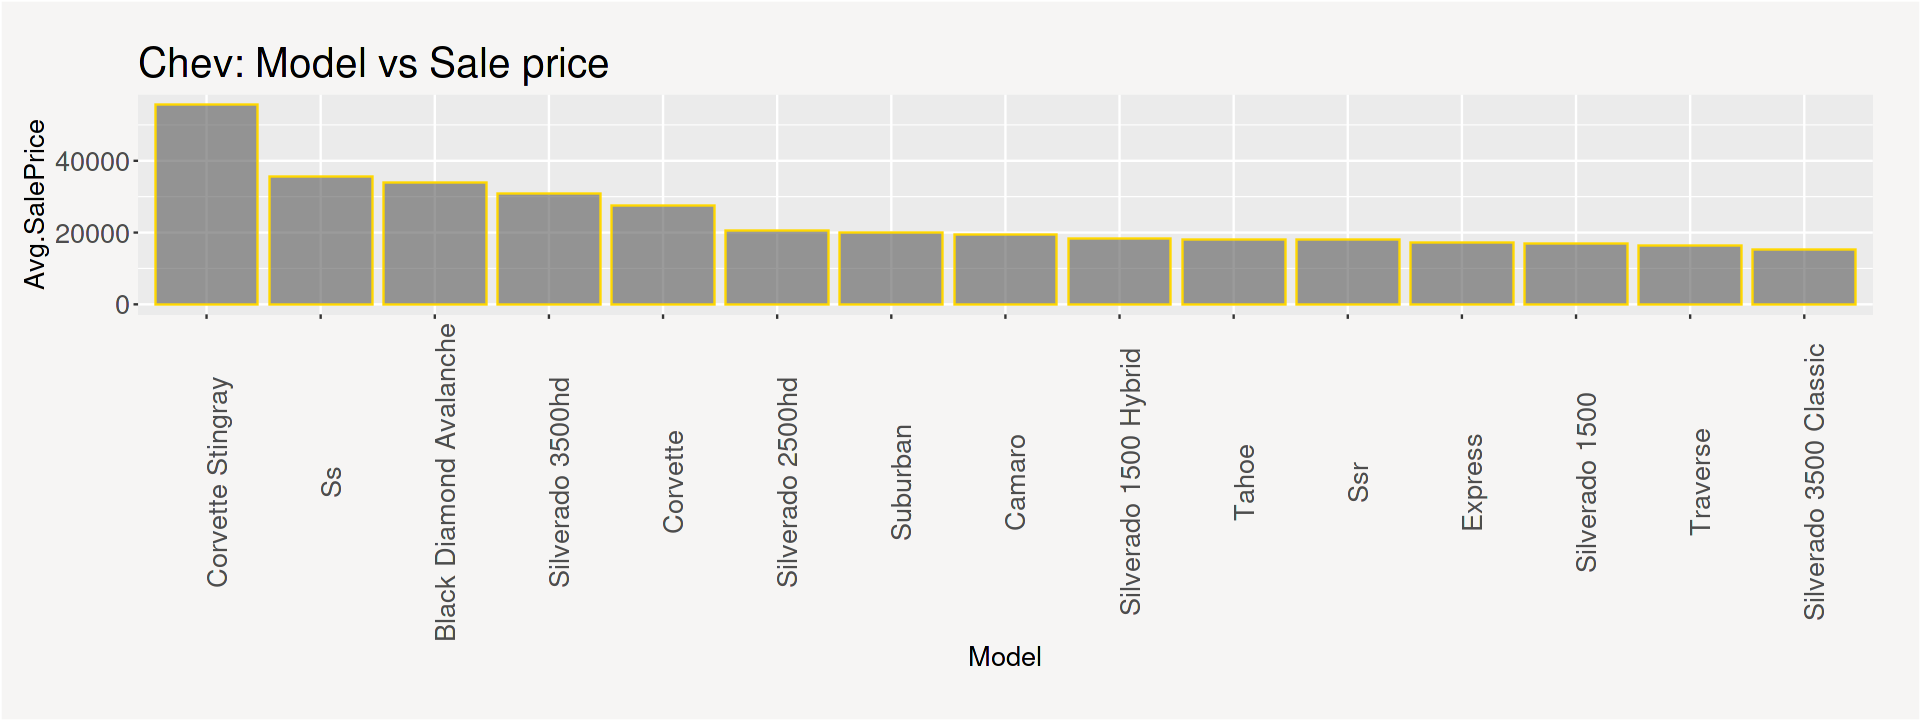

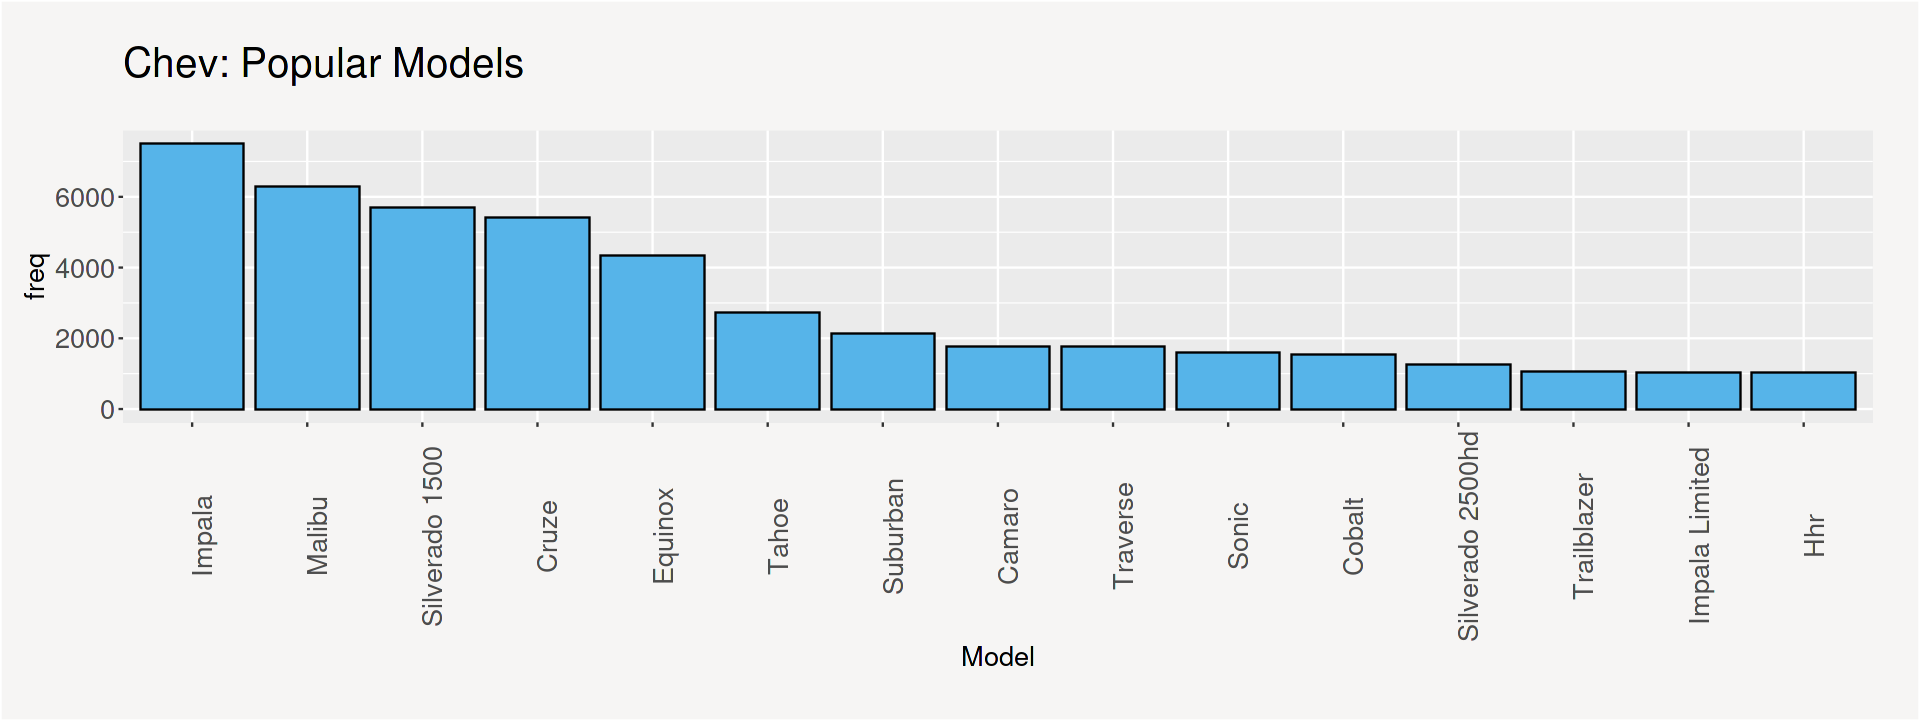

In [46]:
options(repr.plot.width = 16, repr.plot.height = 6)
df <- cars_chev %>% group_by(model) %>%
      summarise(Avg.SalePrice = mean(sellingprice))%>%
      arrange(desc(Avg.SalePrice))%>%
      top_n(15)

p1<-ggplot(df, aes(x = reorder(model, -Avg.SalePrice), y = Avg.SalePrice)) + 
        geom_bar(stat= 'identity', color= 'gold', alpha=0.6)+
        labs(title="Chev: Model vs Sale price" )+ xlab('Model')+
        theme +
        theme(axis.text.x = element_text(angle = 90, hjust=0.5))
p1

df_chev <- cars_chev %>% group_by(model) %>% 
           summarise(freq = n()) %>% 
           arrange(desc(freq))%>%
           top_n(15)
    
p2<-ggplot(df_chev, aes(x = reorder(model,(-freq)), y = freq)) + 
        geom_bar(stat = 'identity', fill="#56B4E9", color='black') + 
        labs(title="Chev: Popular Models", subtitle= "")+
        xlab('Model')+
        theme + theme(axis.text.x = element_text(angle = 90, hjust=0.5))
p2
#p1 + inset_element(p2, left = 0.5, bottom = 0.15, right = 0.99, top = 0.99)

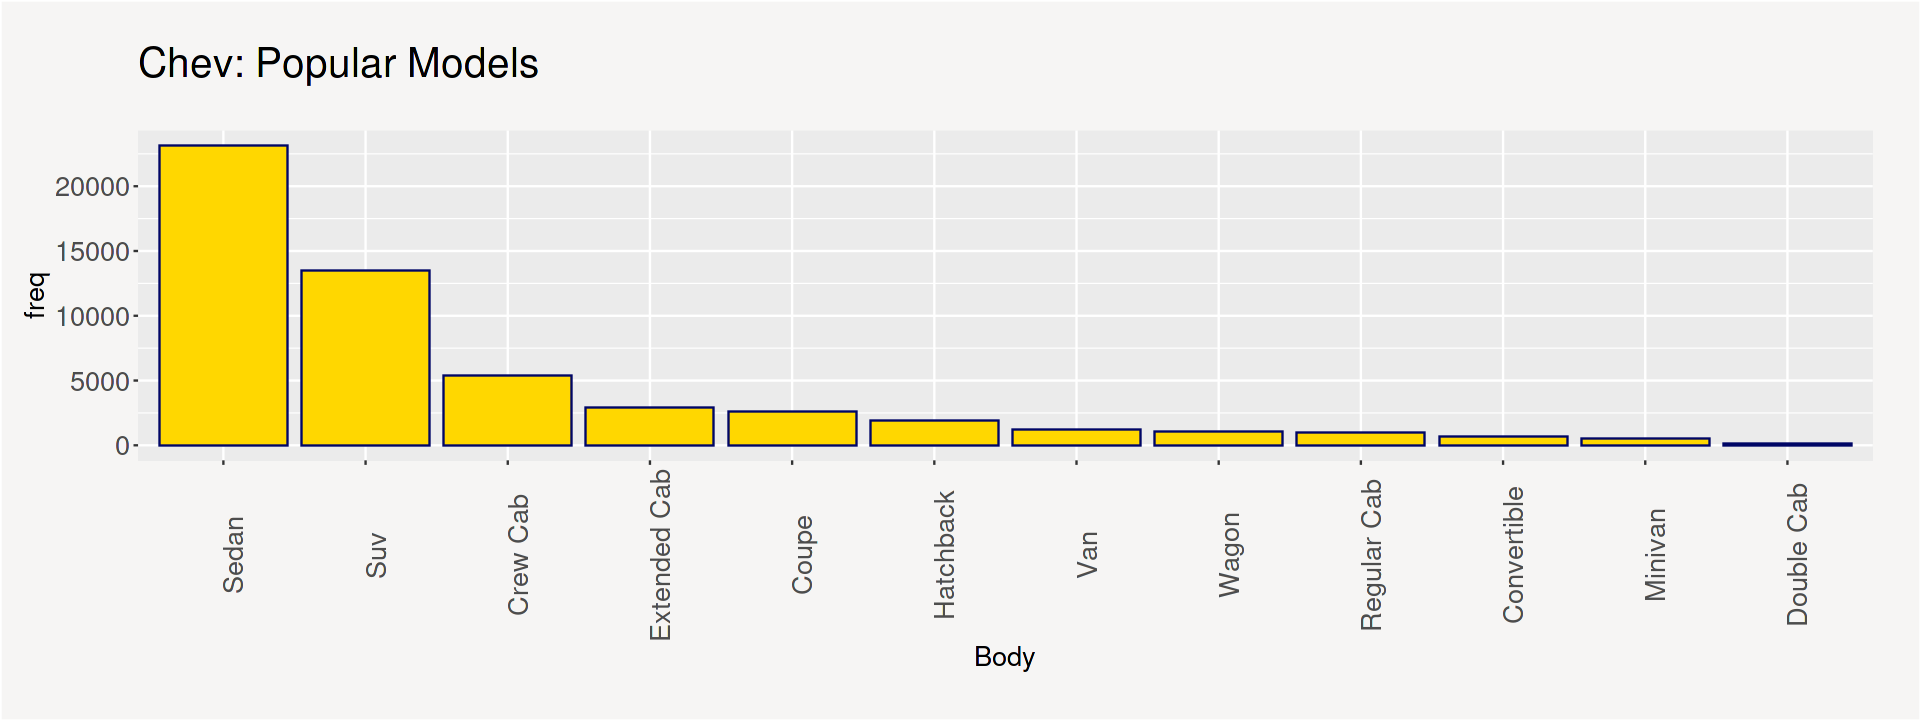

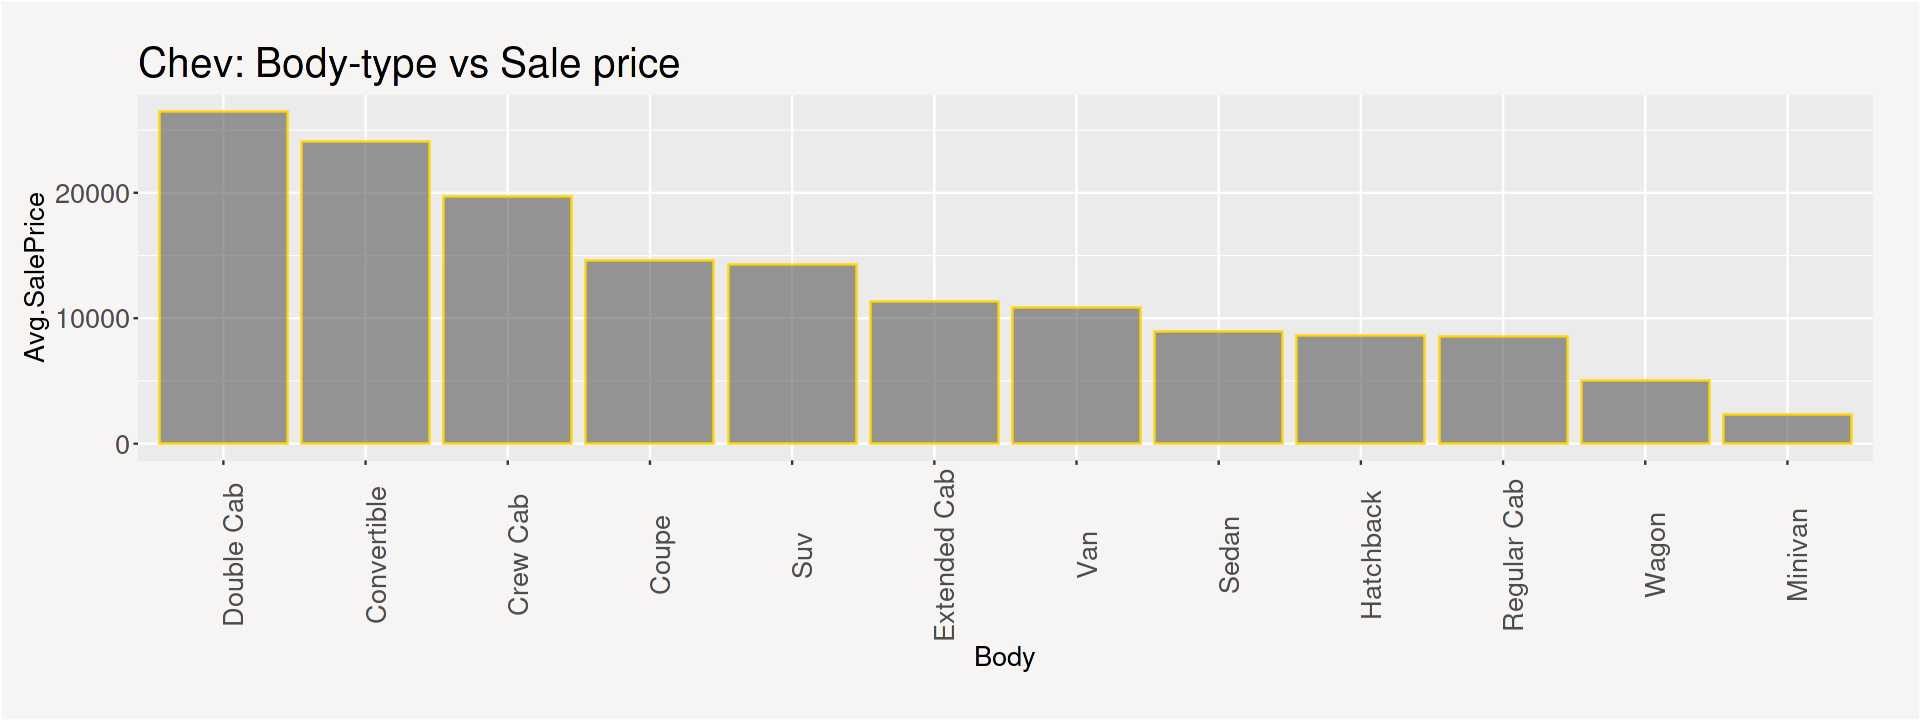

In [47]:
df_chev <- cars_chev %>% group_by(body) %>% 
            summarise(freq = n()) 
            
p3<-ggplot(df_chev, aes(x = reorder(body,(-freq)), y = freq)) + 
        geom_bar(stat = 'identity', color="#000666", fill='gold') + 
        labs(title="Chev: Popular Models", subtitle= "")+
        xlab('Body')+
        theme + theme(axis.text.x = element_text(angle = 90, hjust=0.5))
p3


df <- cars_chev %>% group_by(body) %>%
      summarise(Avg.SalePrice = mean(sellingprice))

p4<-ggplot(df, aes(x = reorder(body, -Avg.SalePrice), y = Avg.SalePrice)) + 
        geom_bar(stat= 'identity', color= 'gold', alpha=0.6)+
        labs(title="Chev: Body-type vs Sale price" )+ xlab('Body')+
        theme +
        theme(axis.text.x = element_text(angle = 90, hjust=0.5))
p4

#### Toyota
* Avalon Hybrid is on average the most expensive Toyota model.
* Carmy and Corolla are the most popular models.
* Sedan is the most popular body type whereas Crewmax and Double Cab are the most expensive ones.

Selecting by Avg.SalePrice

Selecting by freq



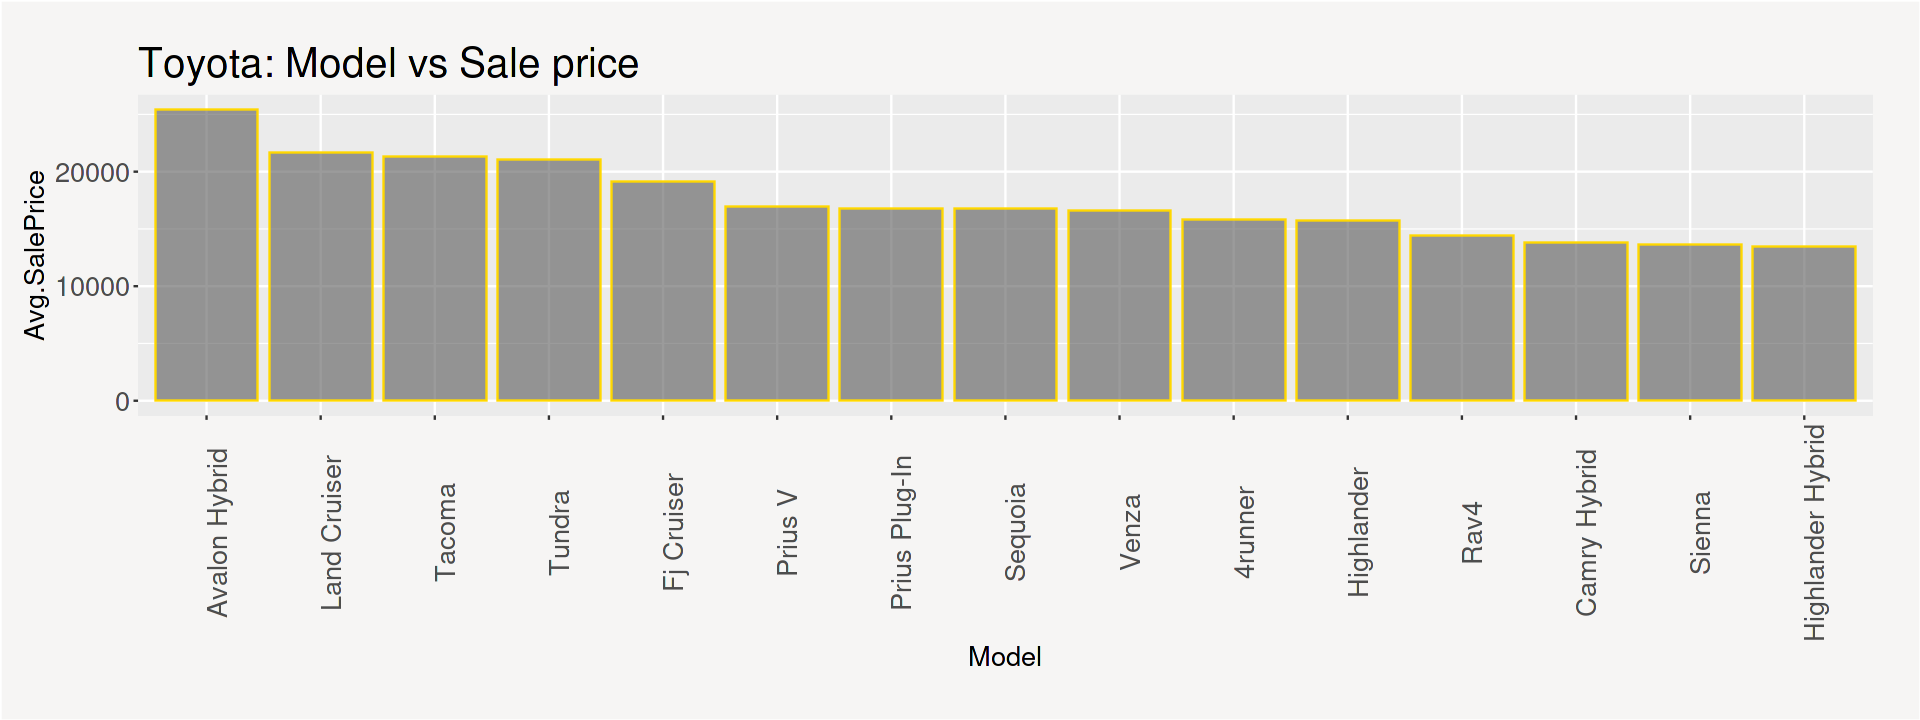

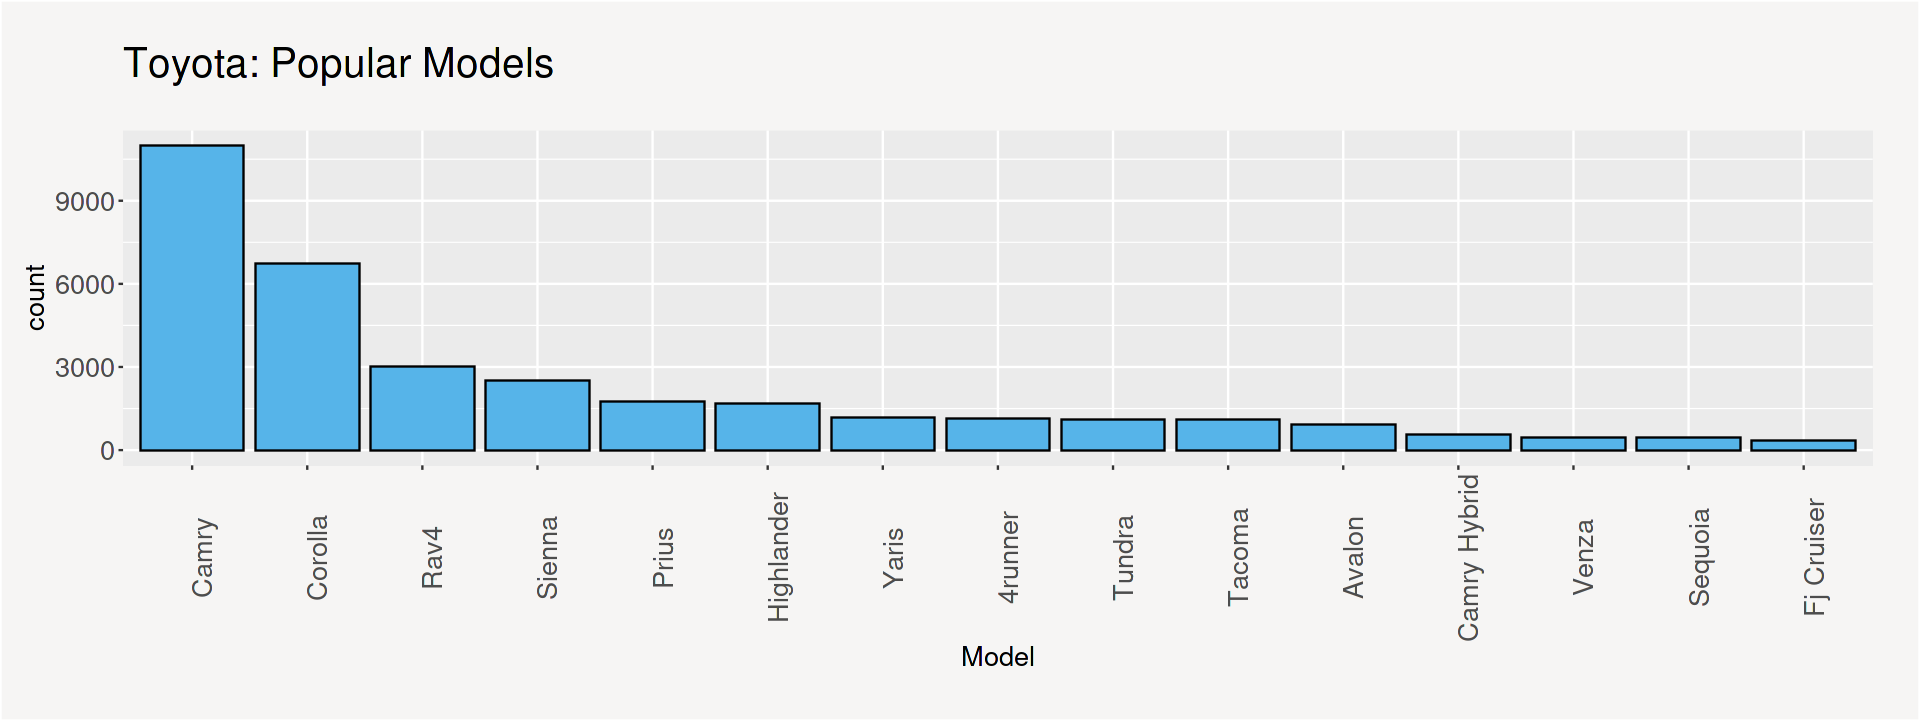

In [48]:

options(repr.plot.width = 16, repr.plot.height = 6)
df <- cars_toyota %>% group_by(model) %>%
      summarise(Avg.SalePrice = mean(sellingprice)) %>%
      arrange(desc(Avg.SalePrice)) %>%
      top_n(15)

p1<-ggplot(df, aes(x = reorder(model, -Avg.SalePrice), y = Avg.SalePrice)) + 
        geom_bar(stat= 'identity', color= 'gold', alpha=0.6)+
        labs(title="Toyota: Model vs Sale price" )+ xlab('Model')+
        theme +
        theme(axis.text.x = element_text(angle = 90, hjust=0.5))
p1

df_toyota <- cars_toyota %>% group_by(model) %>% 
             summarise(freq = n()) %>%
             arrange(desc(freq)) %>%
             top_n(15)
    
p2<-ggplot(df_toyota, aes(x = reorder(model,(-freq)), y = freq)) + 
        geom_bar(stat = 'identity', fill="#56B4E9", color='black') + 
        labs(title="Toyota: Popular Models", subtitle= "")+
        xlab('Model')+ ylab('count')+
        theme + theme(axis.text.x = element_text(angle = 90, hjust=0.5))
p2

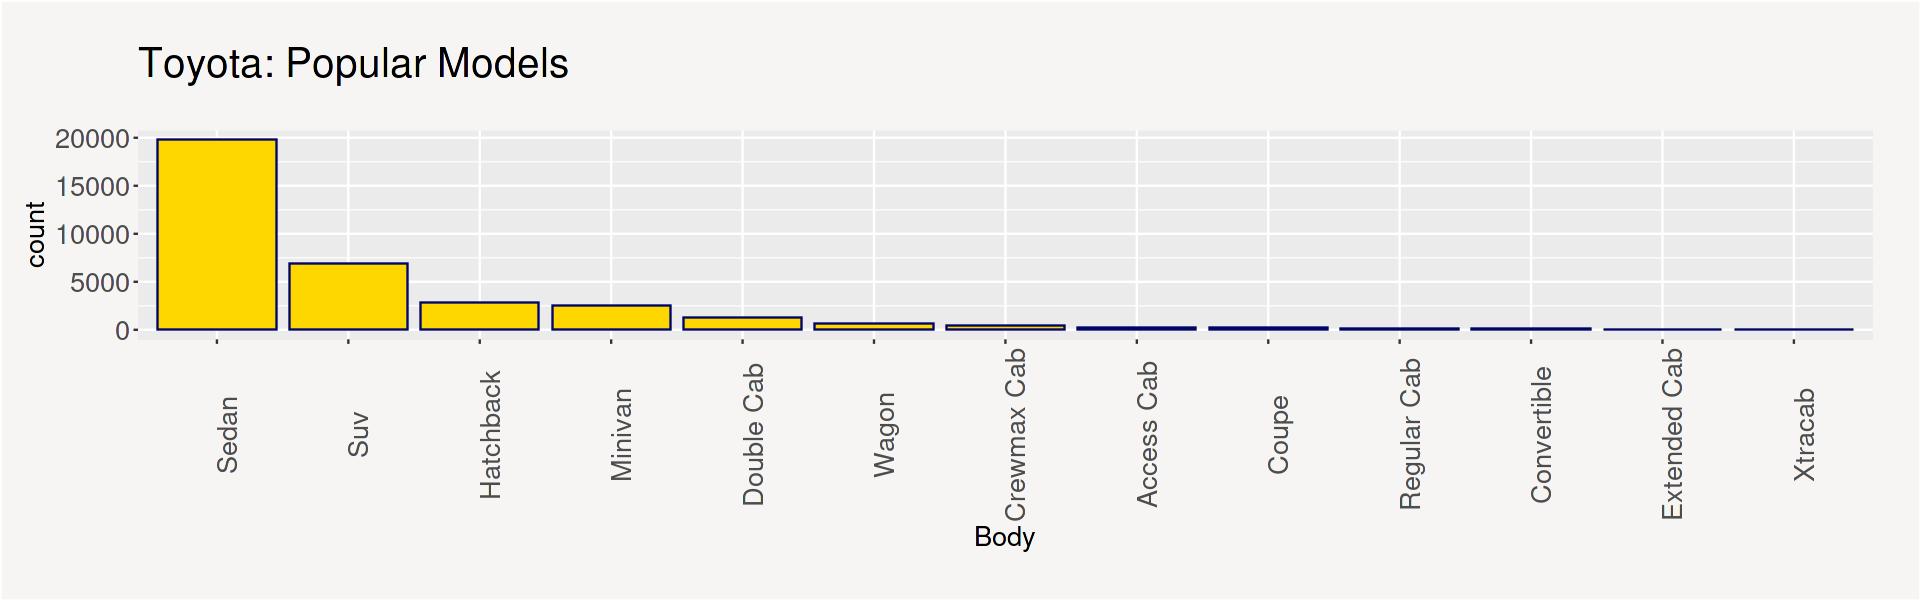

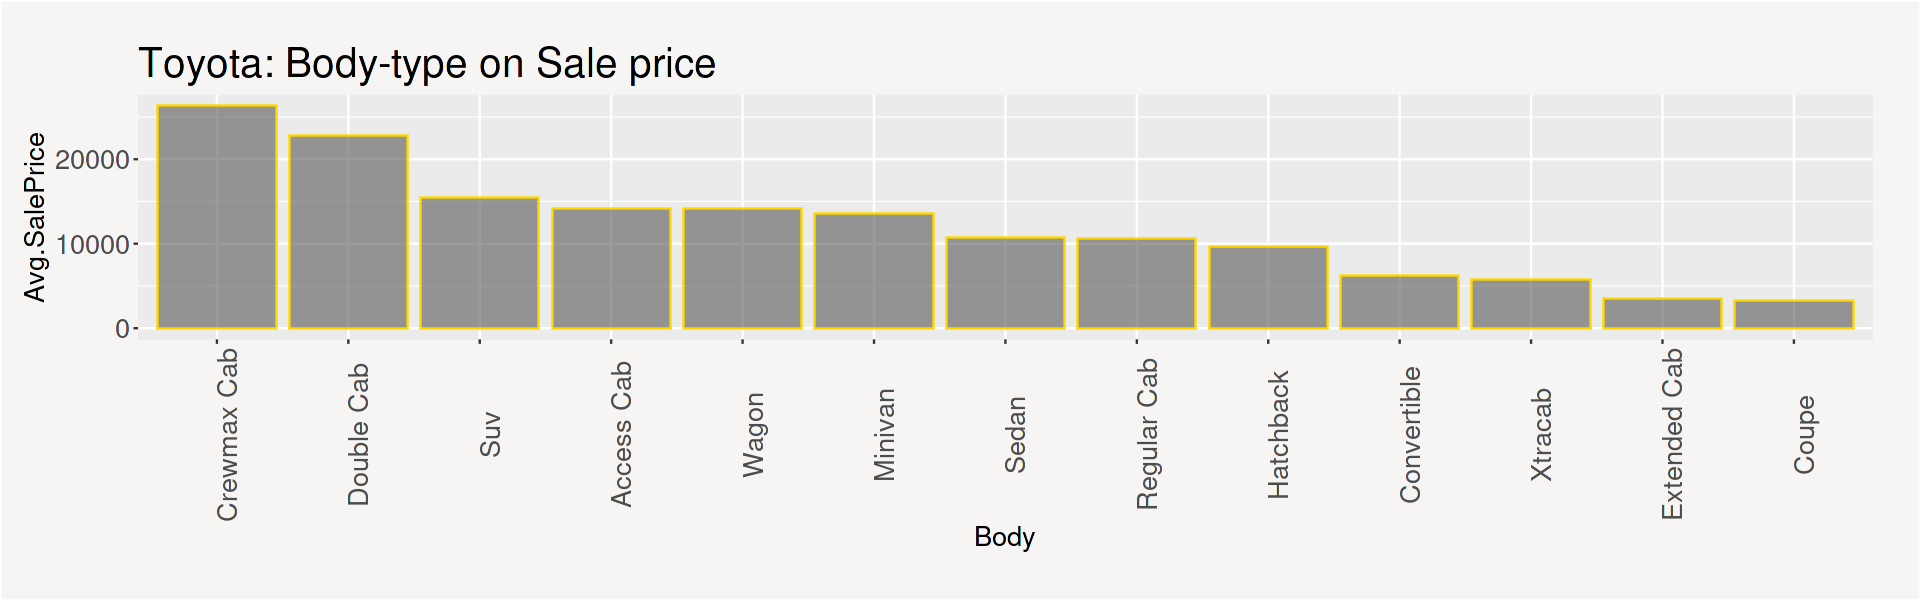

In [49]:
options(repr.plot.width = 16, repr.plot.height = 5)
df_toyota <- cars_toyota %>% group_by(body) %>% 
            summarise(freq = n()) 
    
p3<-ggplot(df_toyota, aes(x = reorder(body,(-freq)), y = freq)) + 
        geom_bar(stat = 'identity', color="#000666", fill='gold') + 
        labs(title="Toyota: Popular Models", subtitle= "")+ 
        ylab('count') + xlab('Body')+
        theme + theme(axis.text.x = element_text(angle = 90, hjust=0.5))
p3


df <- cars_toyota %>% group_by(body) %>%
      summarise(Avg.SalePrice = mean(sellingprice))

p4<-ggplot(df, aes(x = reorder(body, -Avg.SalePrice), y = Avg.SalePrice)) + 
        geom_bar(stat= 'identity', color= 'gold', alpha=0.6)+
        labs(title="Toyota: Body-type on Sale price" )+ xlab('Body')+
        theme +
        theme(axis.text.x = element_text(angle = 90, hjust=0.5))
p4

### Color and Interior
* Color and iterior can have an influence on the sale price of a car
* Below we see that overall color seem to have an influence on the price. But When we compare cars of the same 'bucket', we see that the color influence is insignificant. 

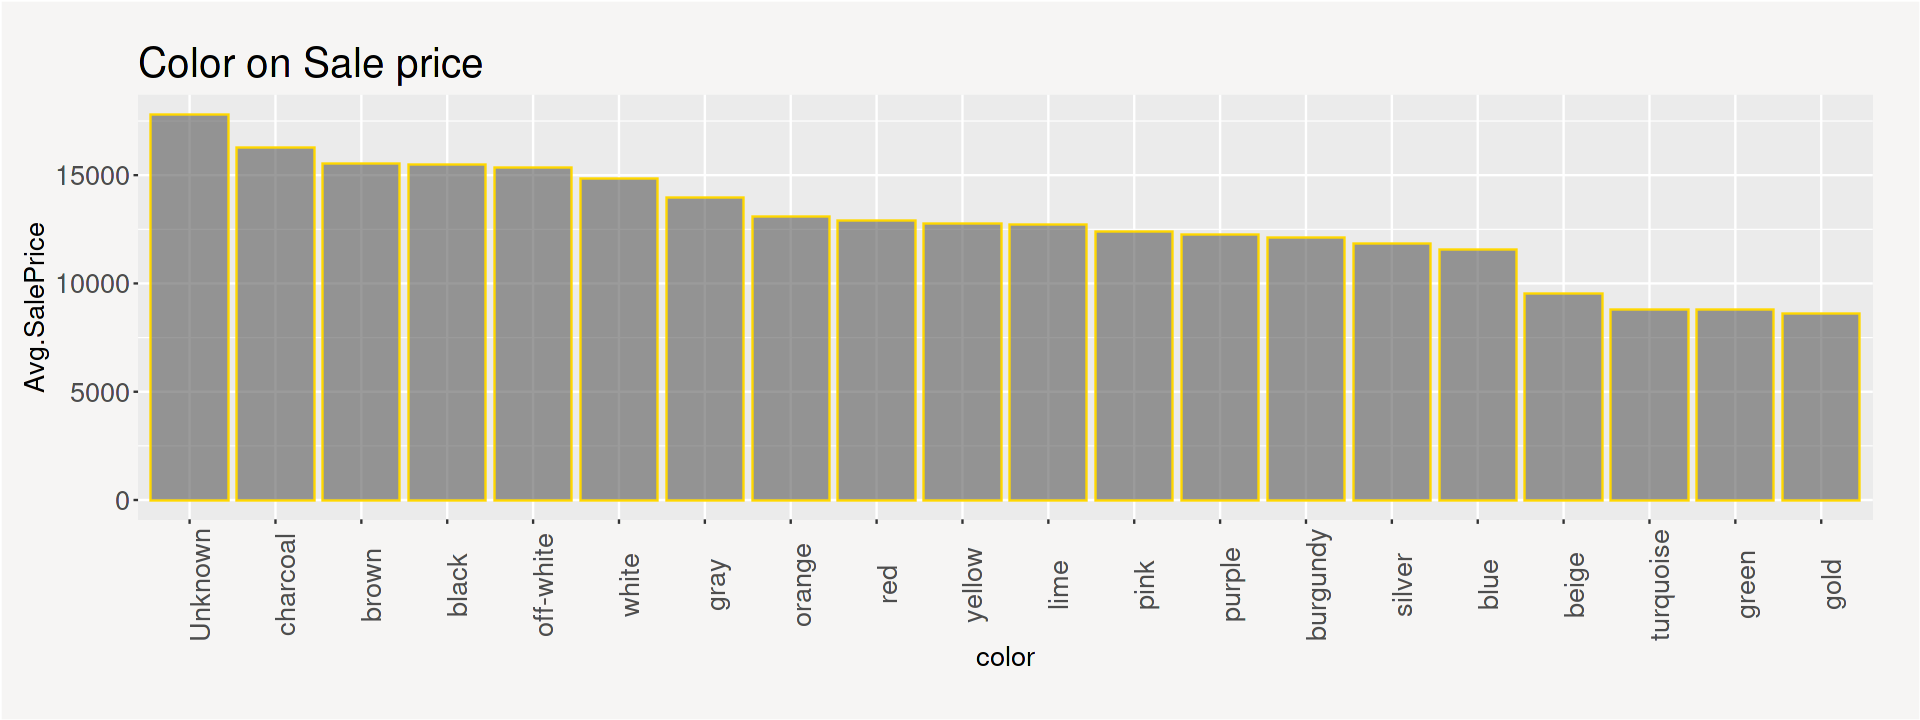

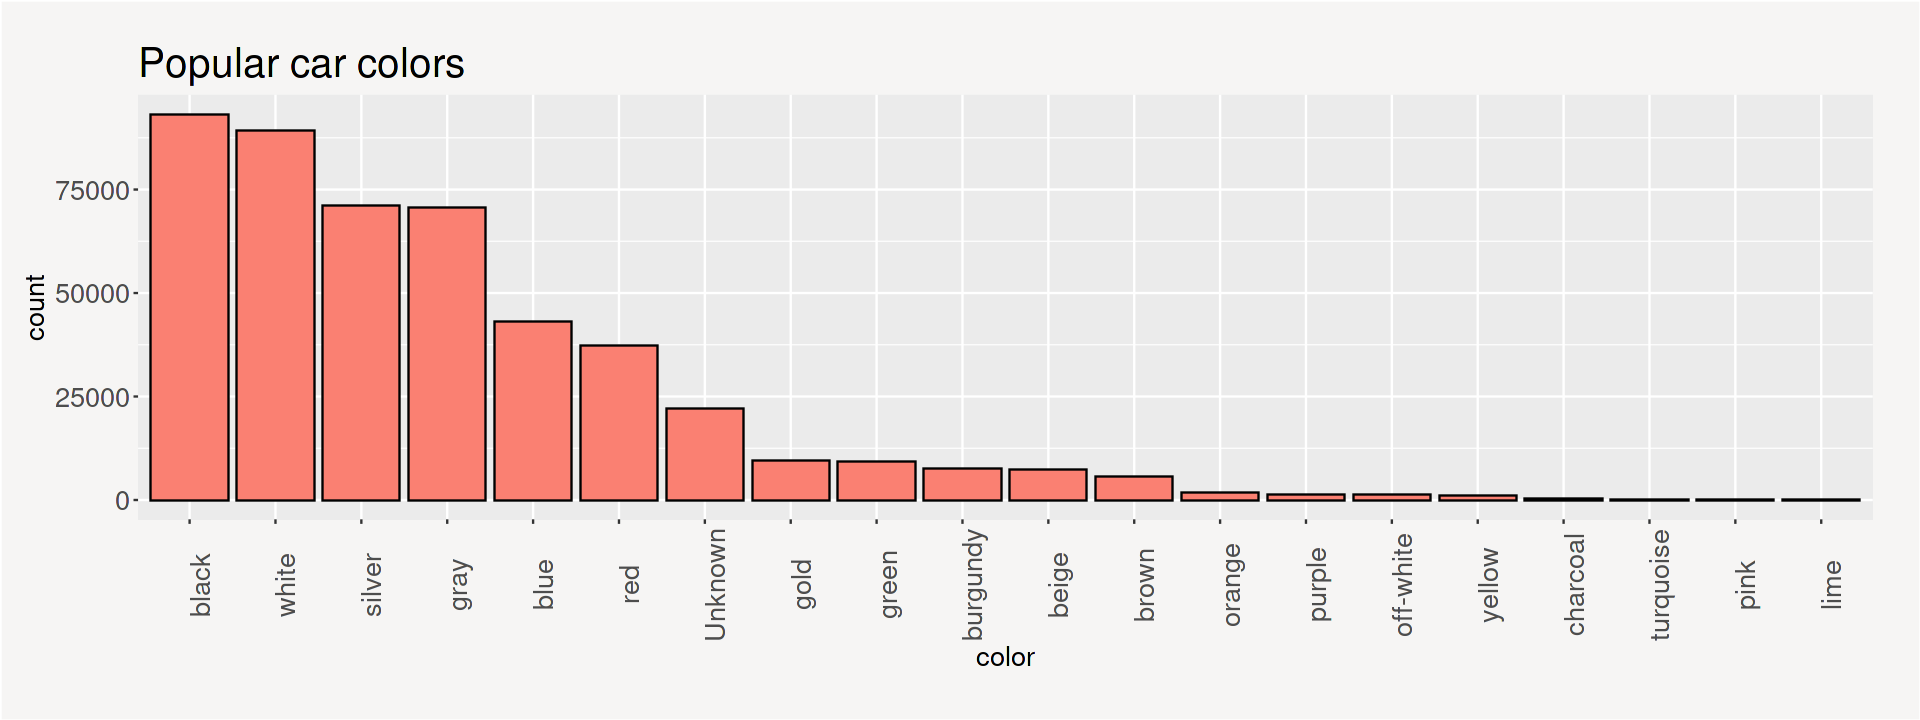

In [50]:
options(repr.plot.width = 16, repr.plot.height = 6)
df <- cars %>% group_by(color) %>%
      summarise(Avg.SalePrice = mean(sellingprice))

ggplot(df, aes(x = reorder(color, -Avg.SalePrice), y = Avg.SalePrice)) + 
        geom_bar(stat= 'identity', color= 'gold', alpha=0.6)+
        labs(title="Color on Sale price" )+ xlab('color')+
        theme +
        theme(axis.text.x = element_text(angle = 90, hjust=0.5))

cars %>% 
    group_by(color) %>% 
    summarise(count = n()) %>% 
    ggplot(aes(x = reorder(color,(-count)), y = count)) + 
        geom_bar(stat = 'identity', fill='salmon', color='black') + 
        labs(title="Popular car colors")+
        xlab('color')+
        theme + theme(axis.text.x = element_text(angle = 90, hjust=0.5))

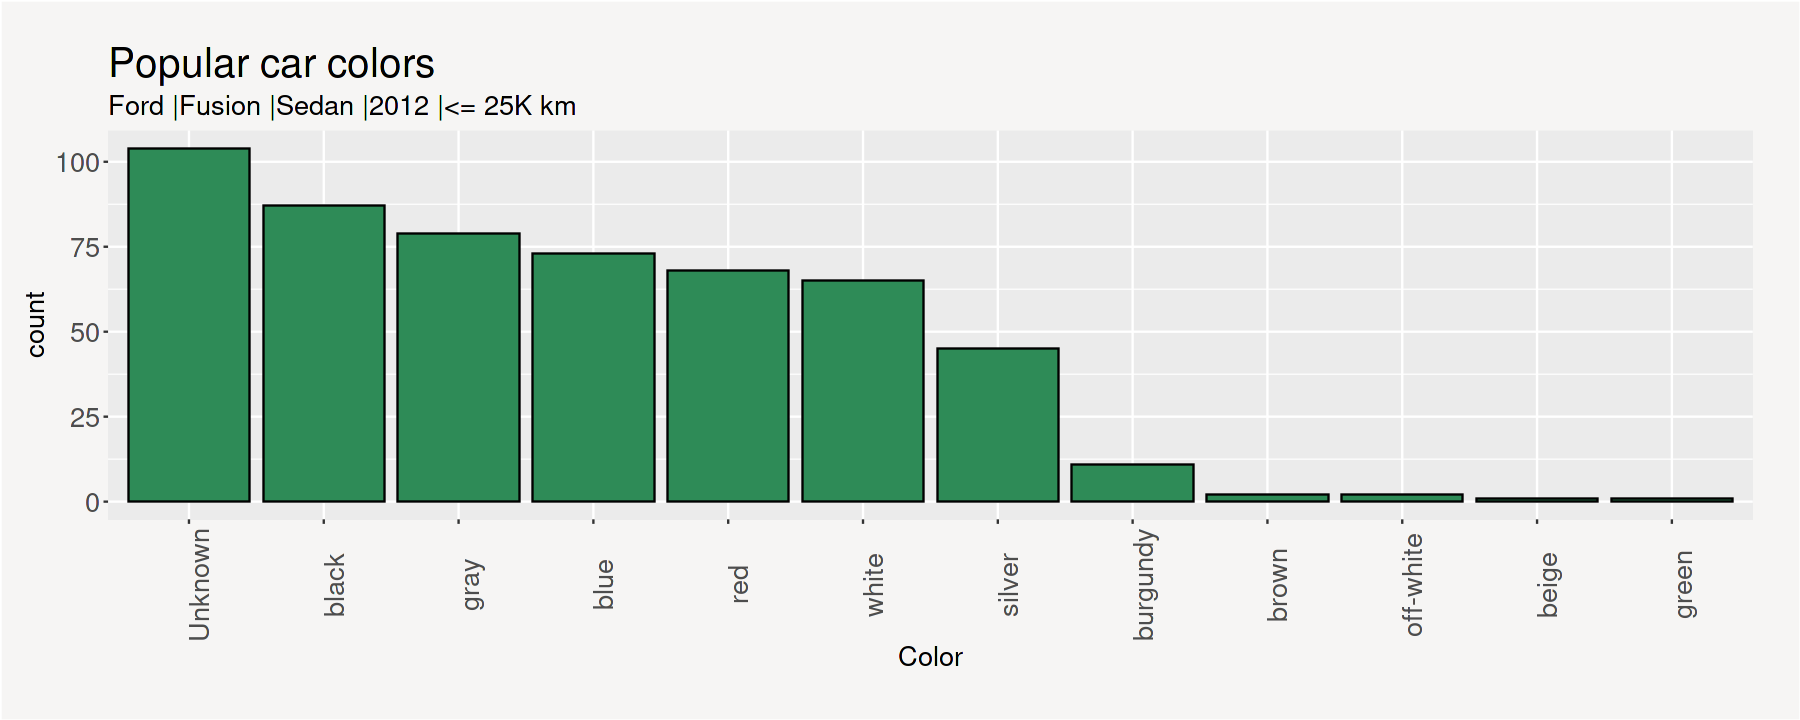

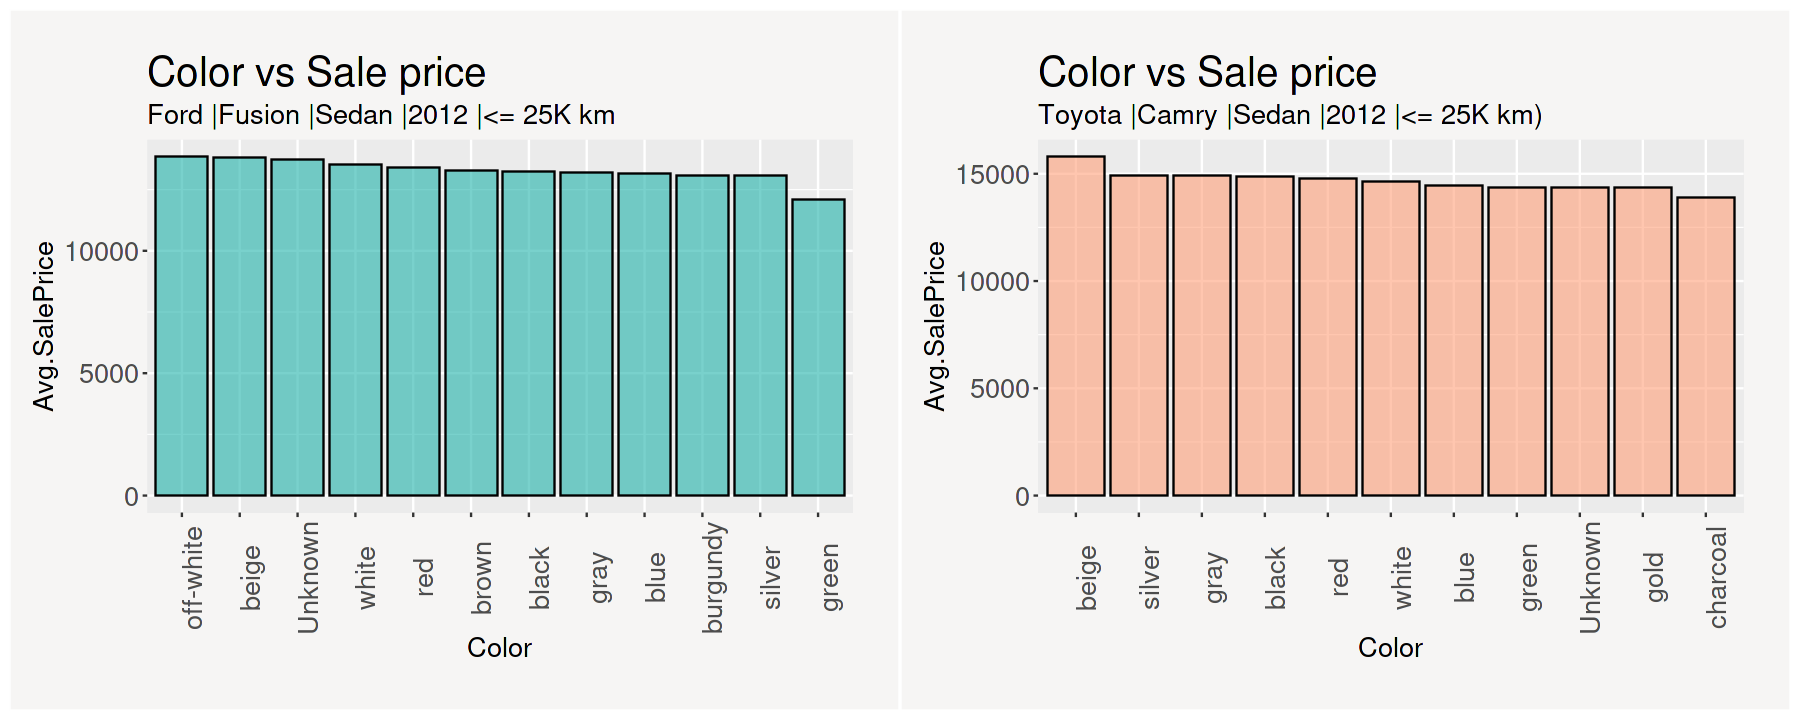

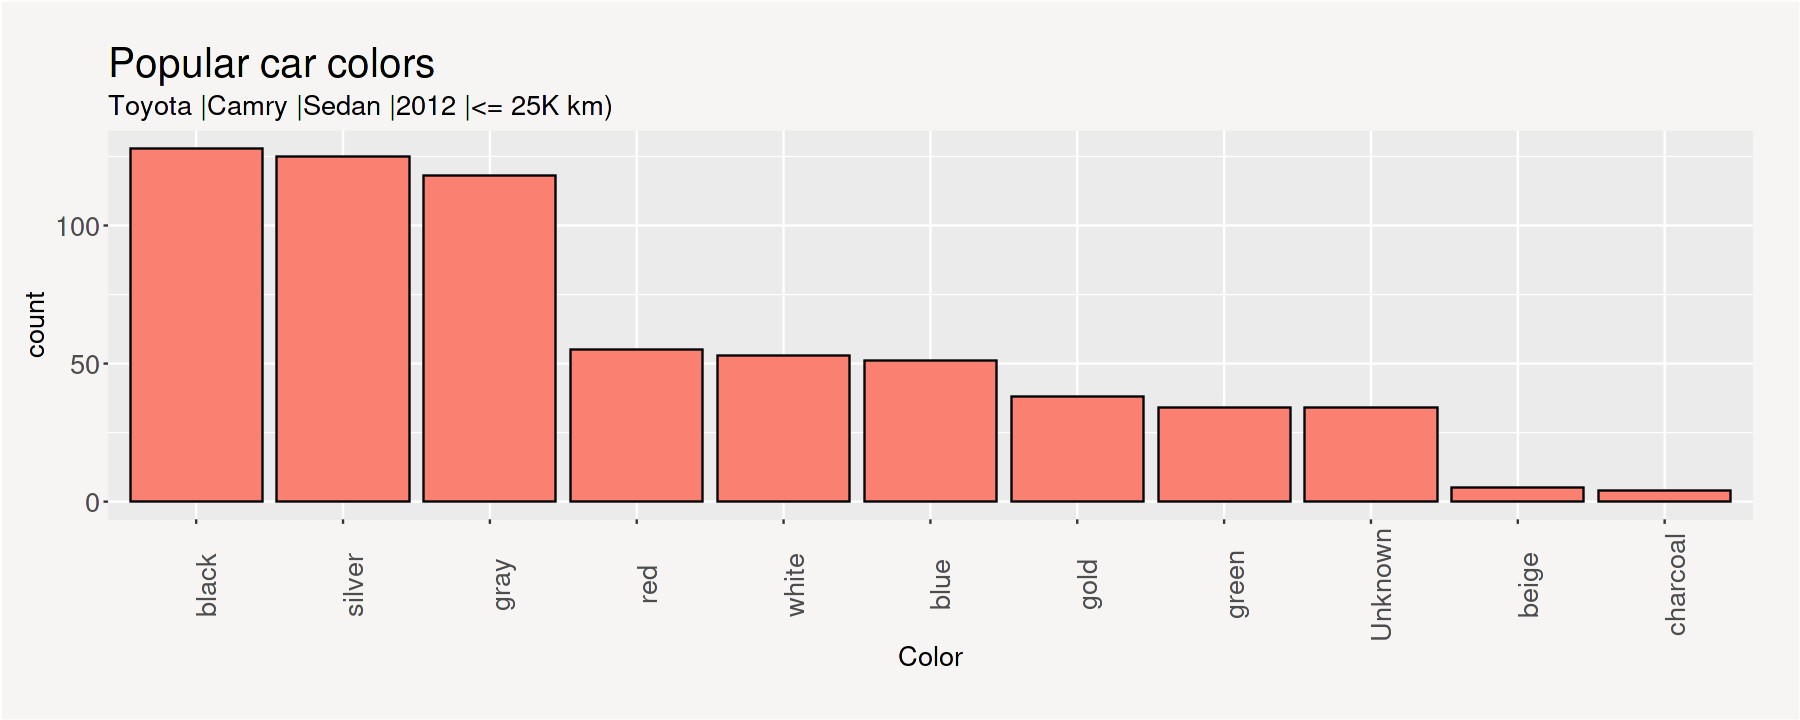

In [51]:
options(repr.plot.width = 15, repr.plot.height = 6)

cars_ford_ <- filter(cars, make=='Ford' & model=='Fusion' & year=='2012' & body=='Sedan' & odometer <= 25000)
cars_toyota_ <- filter(cars, make=='Toyota' & model=='Camry' & year=='2012' & body=='Sedan' & odometer <= 25000)

df <- cars_ford_ %>% group_by(color) %>%
      summarise(Avg.SalePrice = mean(sellingprice))

pf<-ggplot(df, aes(x = reorder(color, -Avg.SalePrice), y = Avg.SalePrice)) + 
        geom_bar(stat= 'identity', fill= 'lightseagreen', color= 'black', alpha=0.6)+
        labs(title="Color vs Sale price", subtitle ="Ford |Fusion |Sedan |2012 |<= 25K km" )+ xlab('Color')+
        theme +
        theme(axis.text.x = element_text(angle = 90, hjust=0.5))

df <- cars_toyota_ %>% group_by(color) %>%
      summarise(Avg.SalePrice = mean(sellingprice))

pt<-ggplot(df, aes(x = reorder(color, -Avg.SalePrice), y = Avg.SalePrice)) + 
        geom_bar(stat= 'identity', fill= 'lightsalmon', color= 'black', alpha=0.6)+
        labs(title="Color vs Sale price" , subtitle ="Toyota |Camry |Sedan |2012 |<= 25K km)") + xlab('Color')+
        theme +
        theme(axis.text.x = element_text(angle = 90, hjust=0.5))

cars_ford_ %>% 
    group_by(color) %>% 
    summarise(count = n()) %>% 
    ggplot(aes(x = reorder(color,(-count)), y = count)) + 
        geom_bar(stat = 'identity', fill='seagreen', color='black', color='black') + 
        labs(title="Popular car colors", subtitle ="Ford |Fusion |Sedan |2012 |<= 25K km")+
        xlab('Color')+
        theme + theme(axis.text.x = element_text(angle = 90, hjust=0.5))
pf + pt

cars_toyota_ %>% 
    group_by(color) %>% 
    summarise(count = n()) %>% 
    ggplot(aes(x = reorder(color,(-count)), y = count)) + 
        geom_bar(stat = 'identity', fill='salmon', color='black') + 
        labs(title="Popular car colors", subtitle ="Toyota |Camry |Sedan |2012 |<= 25K km)")+
        xlab('Color')+
        theme + theme(axis.text.x = element_text(angle = 90, hjust=0.5))

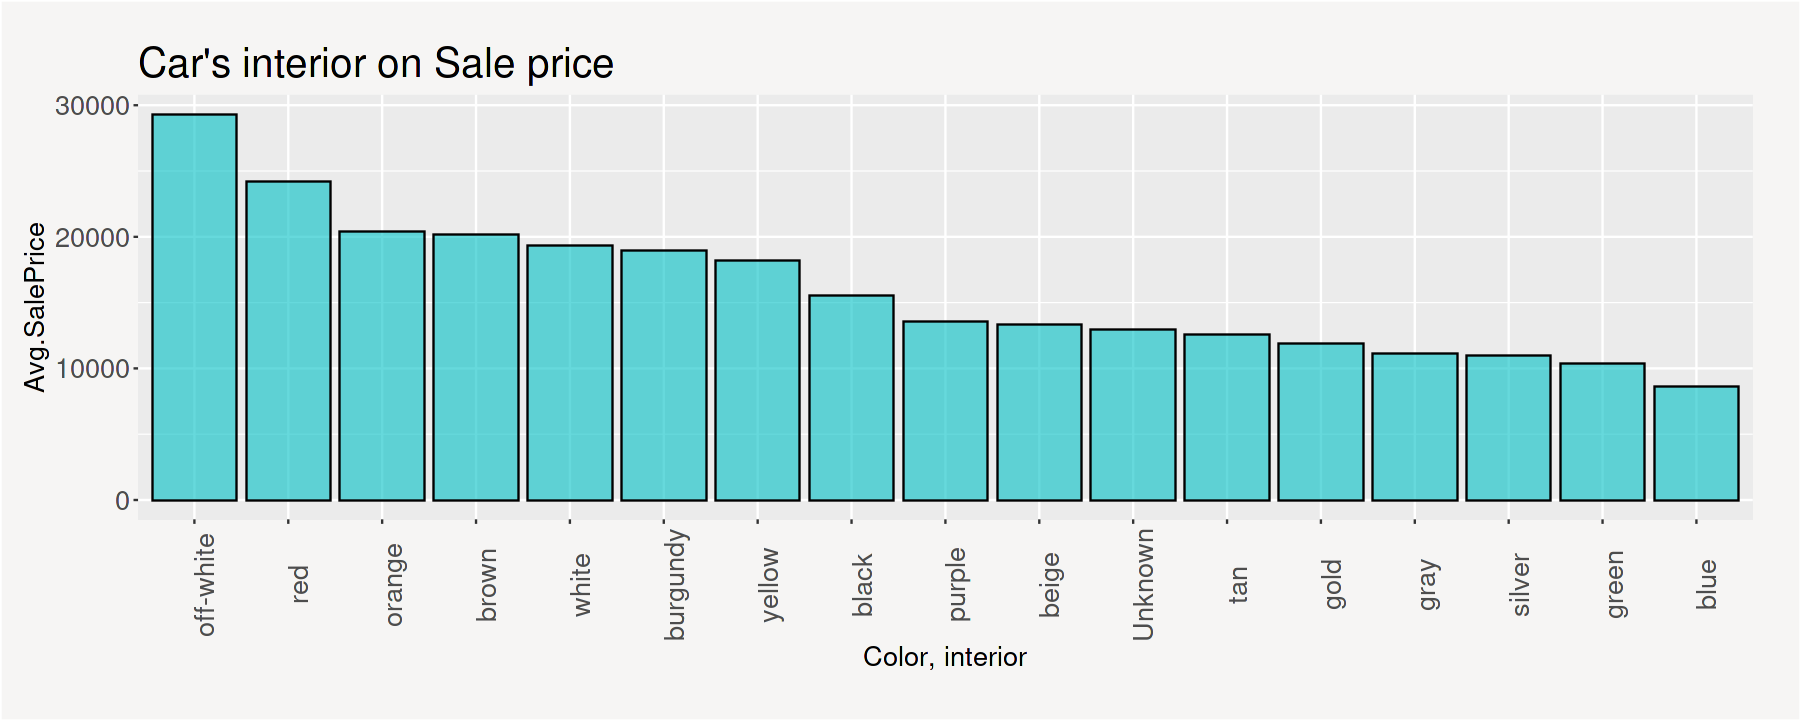

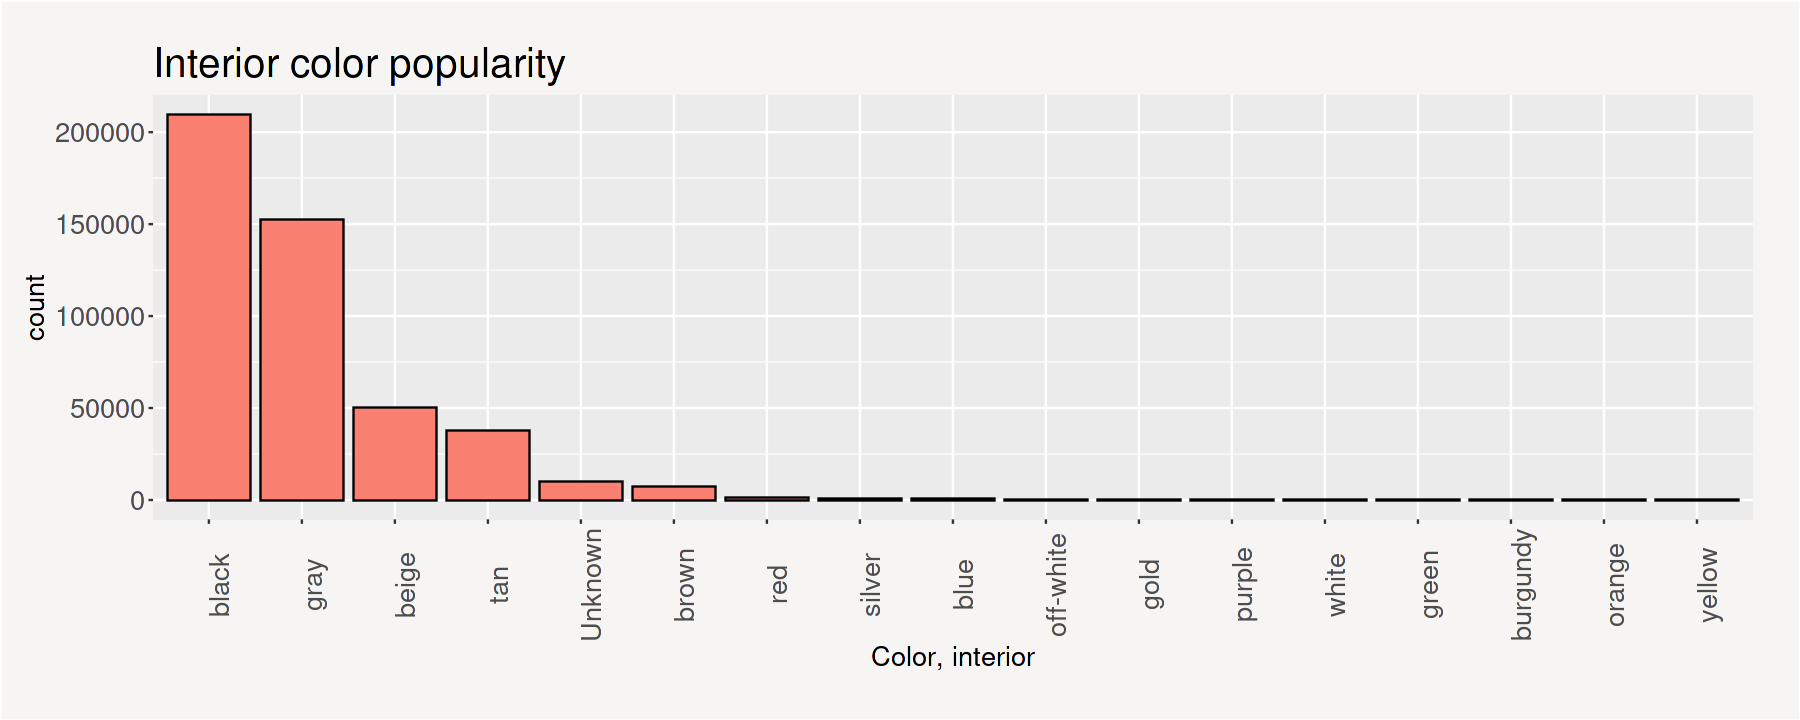

In [52]:
df <- cars %>% group_by(interior) %>%
      summarise(Avg.SalePrice = mean(sellingprice))

ggplot(df, aes(x = reorder(interior, -Avg.SalePrice), y = Avg.SalePrice)) + 
        geom_bar(stat= 'identity', fill='#00BFC4', color='black', alpha=0.6)+
        labs(title="Car's interior on Sale price" )+ xlab('Color, interior')+
        theme +
        theme(axis.text.x = element_text(angle = 90, hjust=0.5))

cars %>% 
    group_by(interior) %>%
    summarise(count = n()) %>% 
    ggplot(aes(x = reorder(interior,(-count)), y = count)) + 
        geom_bar(stat = 'identity', fill='salmon', color='black') + 
        labs(title="Interior color popularity")+
        xlab('Color, interior')+
        theme + theme(axis.text.x = element_text(angle = 90, hjust=0.5))

### States
* Cars live with people. `California, Florida and Texas` (among the most populous states in the US) sold the most cars.
* On average `Tennesse (TN) and New Mexico (NM)` sold the most and the least expensive cars respectively.

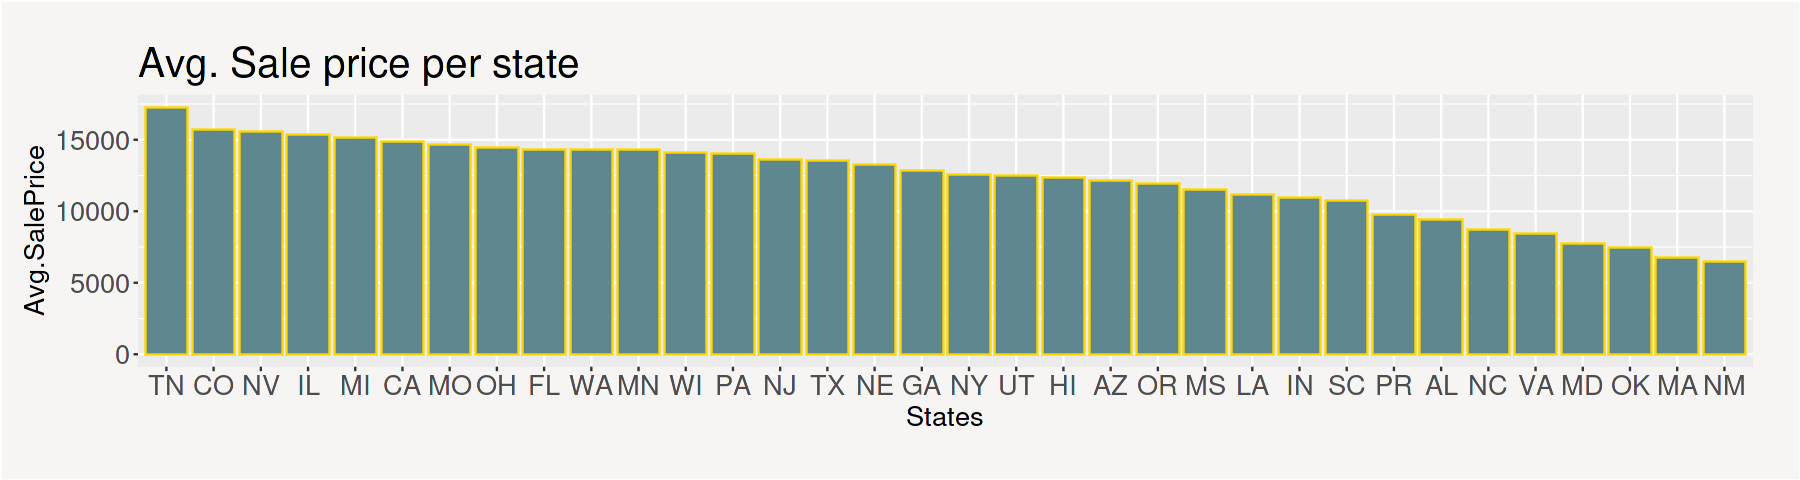

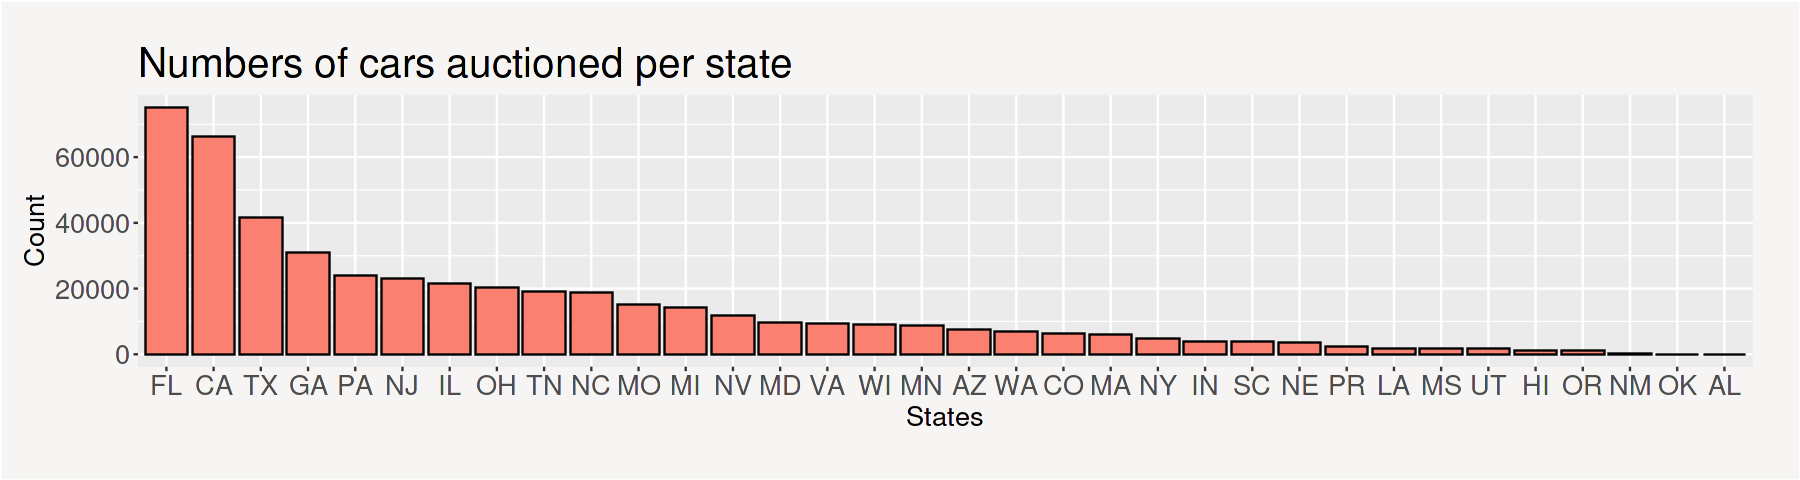

In [53]:
options(repr.plot.width = 15, repr.plot.height = 4)
df <- cars %>% group_by(state) %>%
        summarise(Avg.SalePrice = mean(sellingprice))

ggplot(df, aes(x = reorder(state, -Avg.SalePrice), y = Avg.SalePrice,)) + 
        geom_bar(stat= 'identity', fill='#5F8790', color='gold', alpha=1.0)+
        labs(title="Avg. Sale price per state", xaxis='States' )+
        xlab('States')+
        theme +
        theme(axis.text.x = element_text(angle = 0, hjust=0.5))

cars %>% 
    group_by(state) %>% 
    summarise(freq = n()) %>% 
    ggplot(aes(x = reorder(state,(-freq)), y = freq)) + 
        geom_bar(stat = 'identity', fill='salmon', color='black') + 
        labs(title="Numbers of cars auctioned per state")+
        xlab('States')+ ylab('Count')+
        theme

<a href="#toc">Back to top</a>

<a id="4"></a>

<font color="lightseagreen" size=+2.5><b>4. | Concluding remarks</b></font>

I started my notebook by posing a question, "what matters most while auctioning a used car?". Anyone who bought a used car or helped a relative buy one would have a very good idea as to what the important factors that can impact the selling price of a used car are. Using this dataset, I tried to see what are such factors. Below I summarized the major ones.

* **Brand**: There is no secret here, top brands and high-end luxury cars sale for higher price. 
* **Odometer**: The less a car has been driven, the higher the price would be when it is sold as a second-hand car. Unless someone has a special emotional/personal attachment to a certain model, a high figure on the odometer means people are less likely to pay a high price for it. We are talking about the heart (engine) of a car here.
* The model **year** of the car: The more recent the model year of the car is, the more likely to be sold for a higher money. This feature, in most cases, is related to the odometer. The Recent model year of the car is the least likely to have a high odometer reading. 


Additional points: 

* The **mmr** estimations are pretty accurate. If you can have a hand on it before you buy a car, please do so.
* US and Canada drive mainly **automatic** cars (stating the obvious).
* **Sedan** is the most popular body type both in the common cars as well as in the luxury cars category.


<a id="5"></a>

<font color="lightseagreen" size=+2.5><b>5. | Reference</b></font>

* https://www.kaggle.com/desalegngeb/a-short-tutorial-in-r-easy-start
* https://r4ds.had.co.nz/index.html
* https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/used-cars-new-platforms-accelerating-sales-in-a-digitally-disrupted-market
* https://www.autoremarketing.com/trends/features-info-used-car-buyers-want-most
* https://joinyaa.com/guides/what-are-mmr-values/
* https://www.autocheck.com/vehiclehistory/vin-basics


**If you are a absolute beginner in R, you may find my first R-notebook interesting and useful.**

LINK: https://www.kaggle.com/desalegngeb/a-short-tutorial-in-r-easy-start

<a href="#toc">Back to top</a>

### END OF NOTEBOOK!
